<a href="https://colab.research.google.com/github/SepehrSepehri/DataForGoodWR/blob/main/DataForGood_v4_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Learn Twitter Data scraping & analysis**

# 1- Scraping Data

## **1-1- Accessing web APIs**
<br>

**Background:**


*Application Program Interfaces (APIs) are sets of protocols that govern interactions between sites and users.*

APIs are similar to web browsers but Web APIs manage and organize data.

For public APIs, many sites only allow authorized users:
*Twitter, Facebook, Instagram, Github, etc.*

<br>



**Twitter APIs:**

To connect to Twitter's APIs, users need a consumer key and consumer secret, which you can get by creating a Twitter app.



Creating a Twitter App
1. Log in to your [Twitter.com](https://) account
2. Go to [apps.twitter.com](https://)
3. Select: Create New App

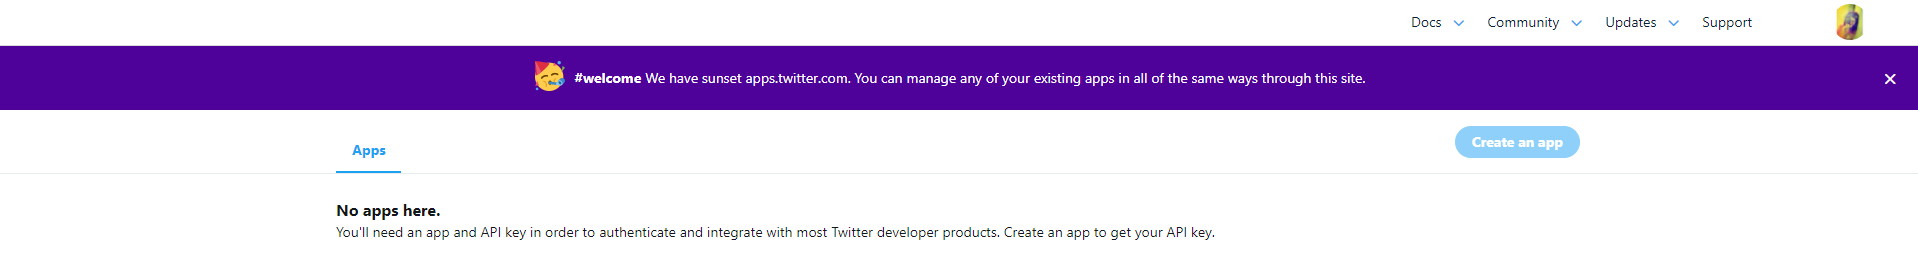

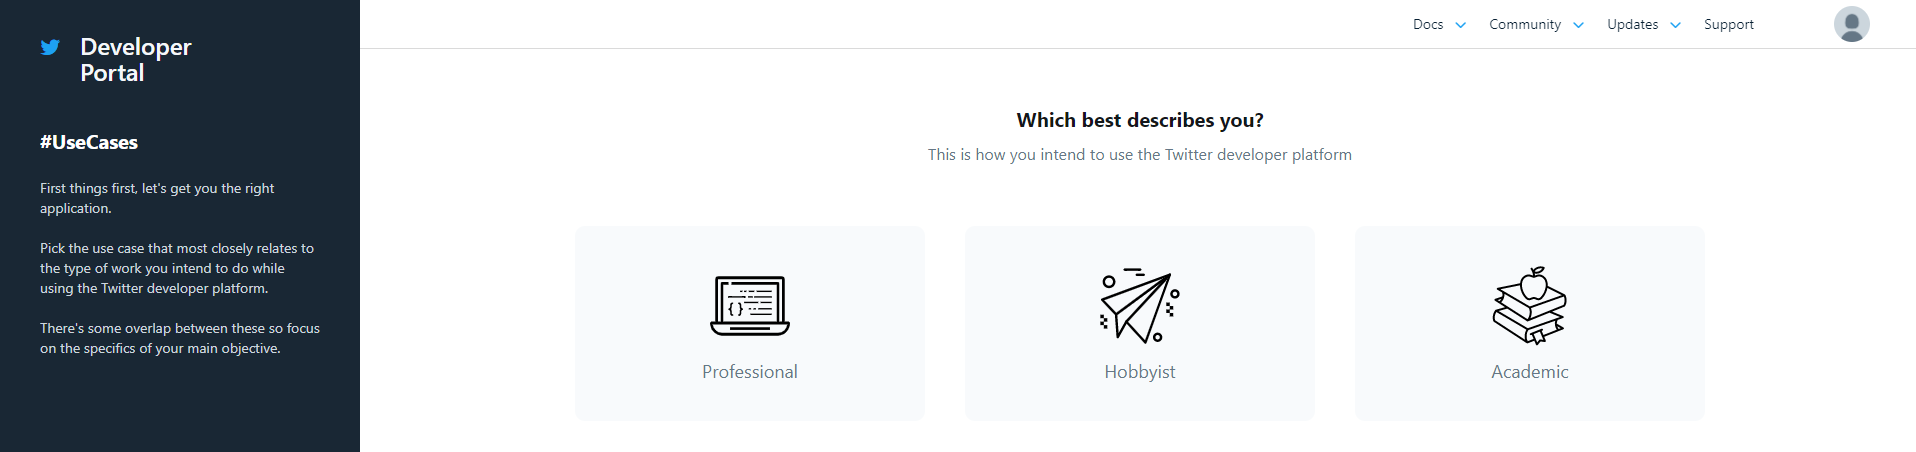

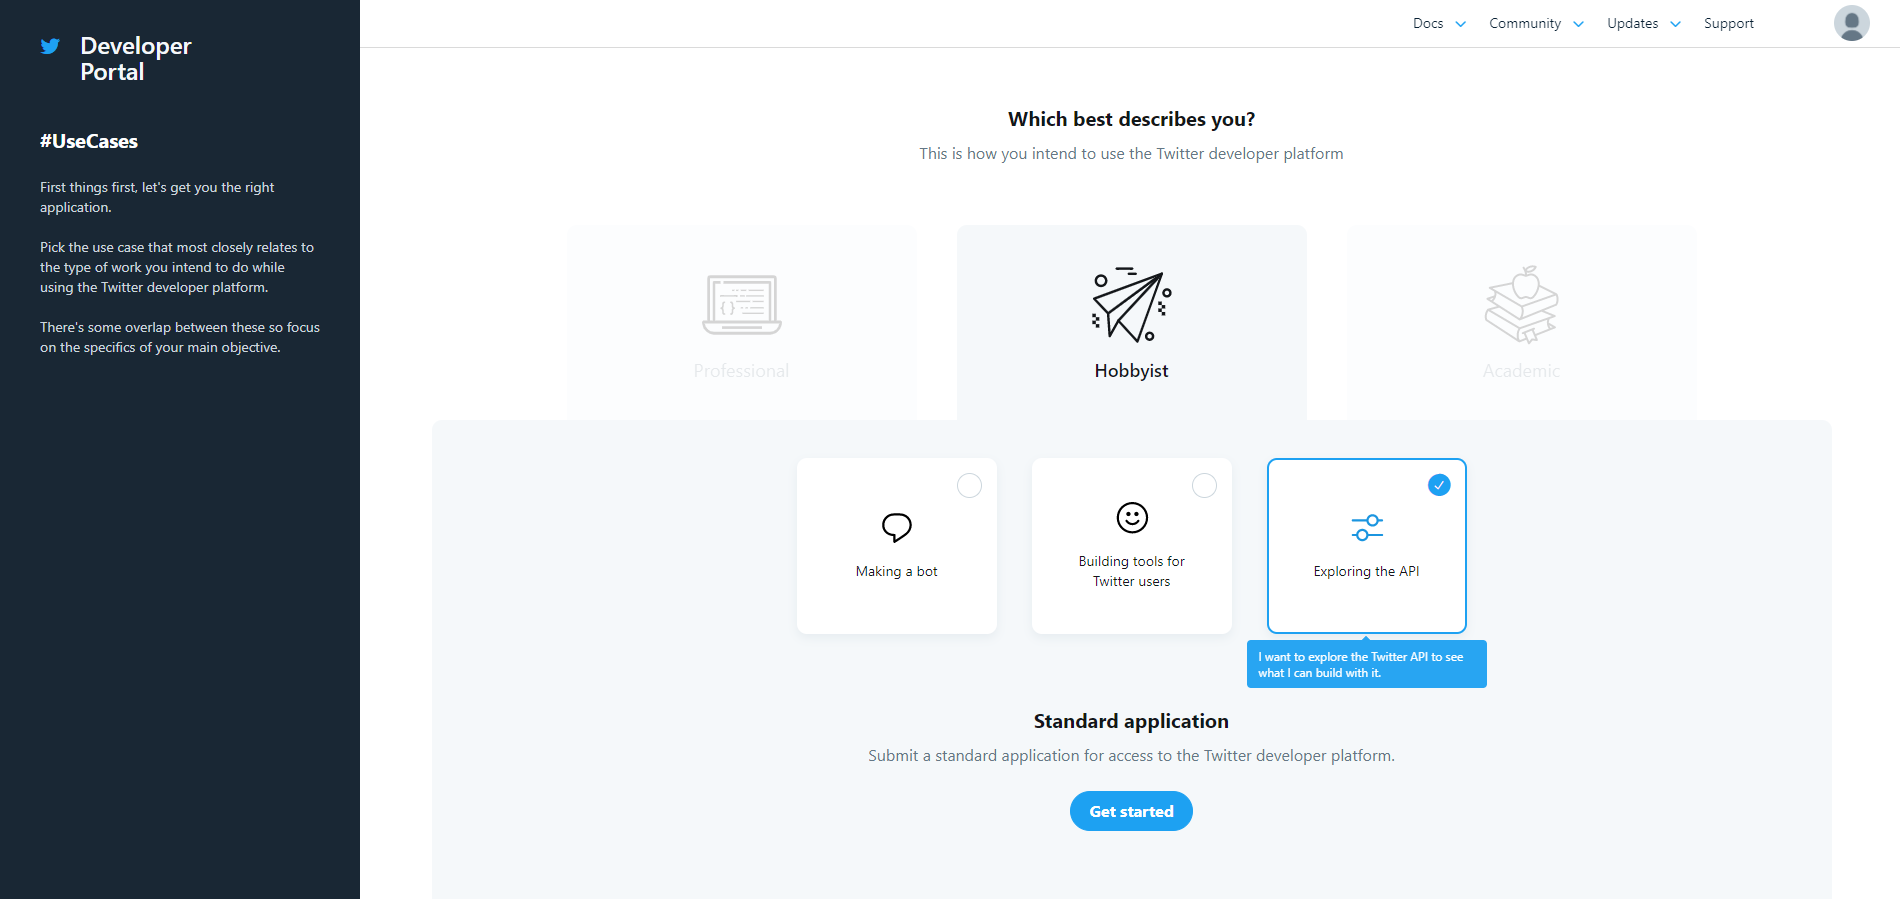

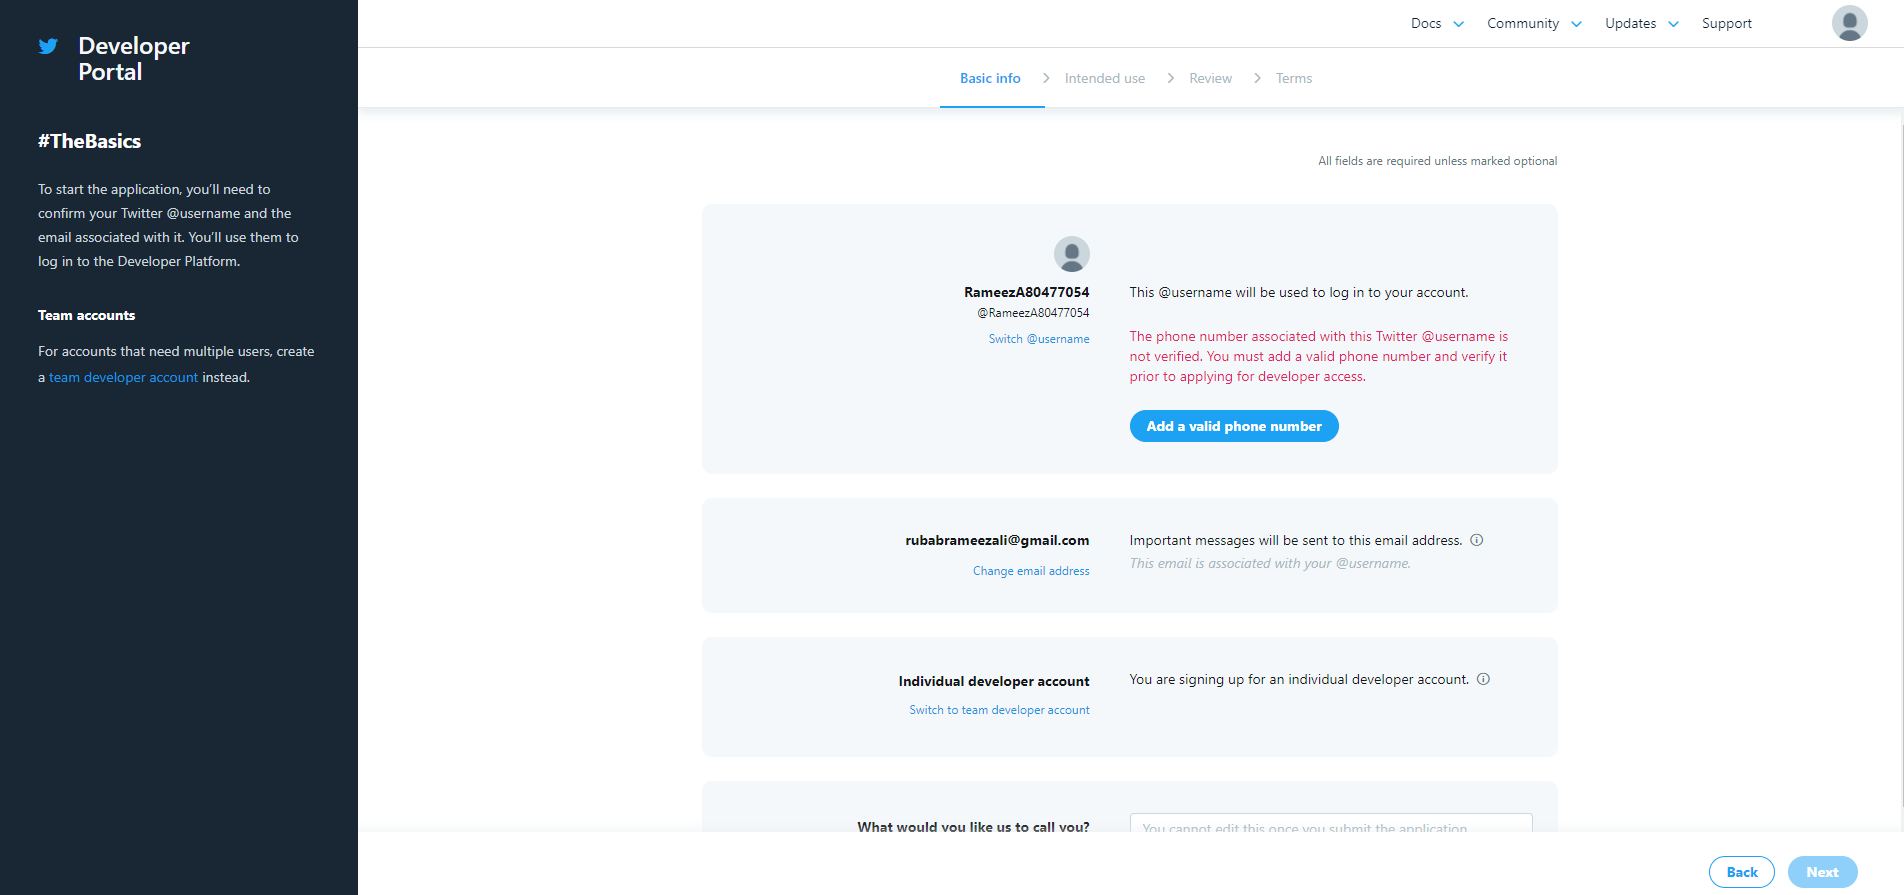

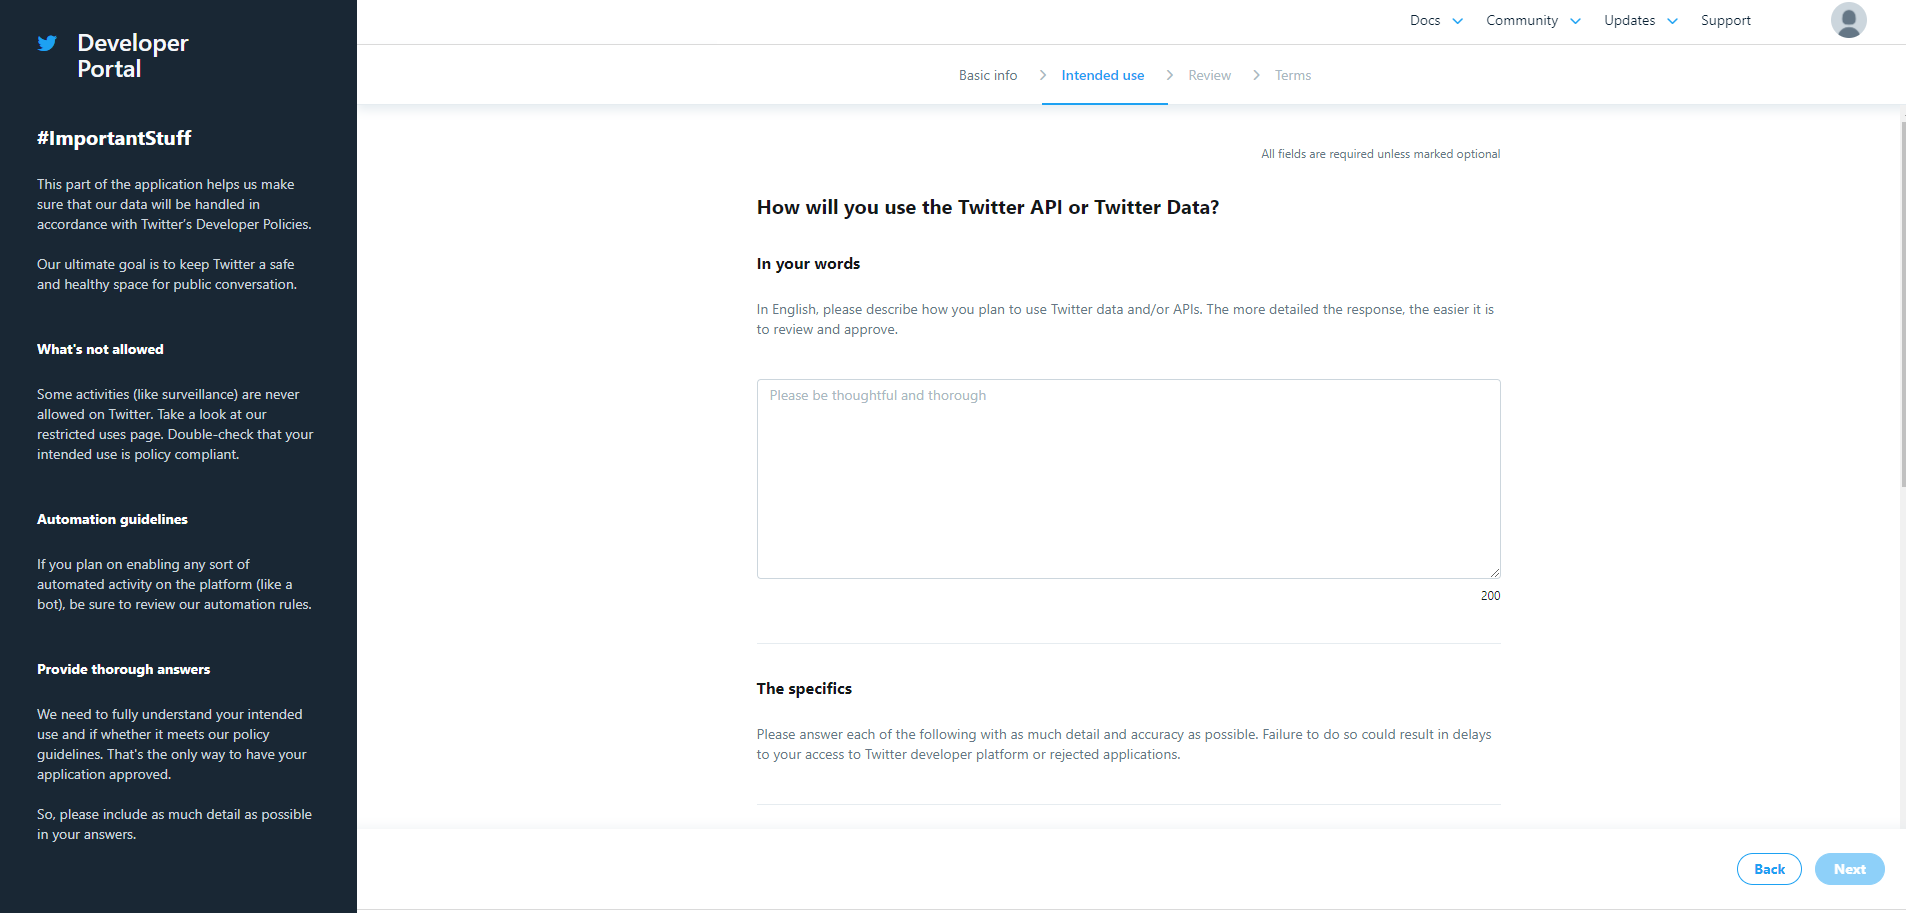

Complete the fields (important: Callback URL must be exact)


*   Name: twitter_app
*   Description: something about analyzing Twitter data
*   Website: https://twitter.com/{{you_screen_name}}
*   Callback URL: http://127.0.0.1:1410

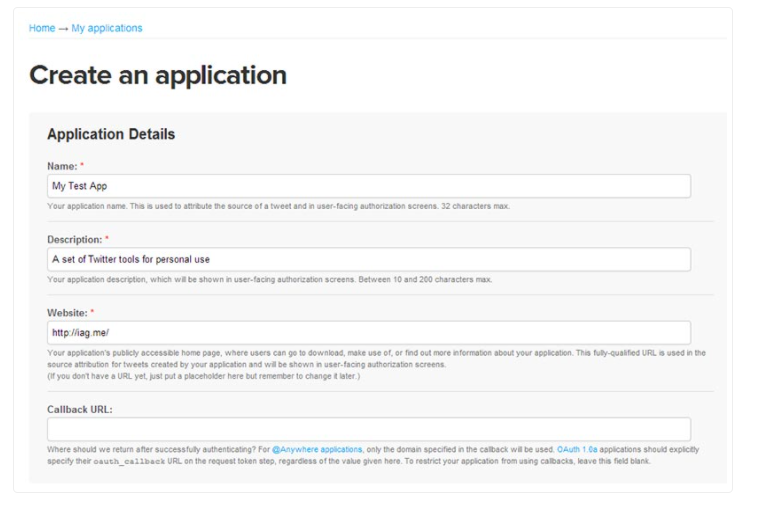

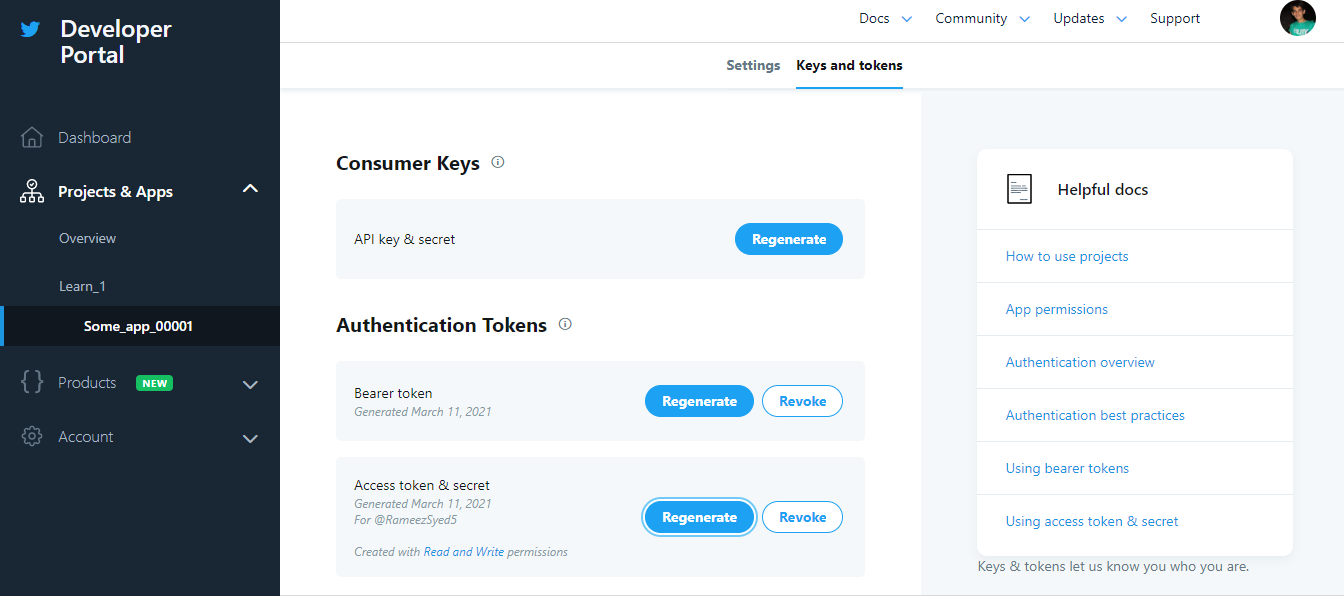

Copy the keys

*   Click Create your Twitter application
*   Select Keys and Access Tokens tab
*   Copy the Consumer Key (API Key) and Consumer Secret (API Secret) and paste into python script

In [ ]:
consumer_key= 'XXXXXXXXXXXXXXXXXXXXXXXXXXXX'
consumer_secret= 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXx'
access_token= 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXx'
access_token_secret= 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXx'


In [2]:
# importing libraries:
import tweepy as tw
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
# connecting to twitter API and Creating API object
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

## **1-2- Extracting tweets and Exploring Dataset**
*   Read in the tweets data using pandas
*   Explore the data
*   Some ideas of things to look for:
  *   the dimensions of the data
  *   get DataFrame info
  *   get summary statistics
  *   get the value counts of categoric columns
  *   count missing values





In [ ]:
# Define Supporting fucntions to extract url and hashtags from data:
def url_tweet(url_arg):
  for url in url_arg:
    return url['expanded_url']

    # Sepehr: I defined this function to extract hashtags:
def hashtag_tweet(entity_arg):
  for entity in entity_arg:
    return entity['text']

# Define a fucntion to extract tweets from a twitter account timeline and save them in a Pandas Dataframe:
def tweet(user):
  print(f'retrieving tweets from {user}.... ')
  print('This fucntion may take several minutes to run. When the retrieving is finished, you will see the message showwing the end of the process.')
  tweets = tw.Cursor(api.user_timeline,
                   screen_name=user,
                   lang="en",
                   since="2010-01-20",
                   until='2021-02-28').items(10000)

  
  users_locs = [[tweet.user.id,tweet.created_at,tweet.user.screen_name, tweet.text,
               tweet.user.location,tweet.favorite_count,tweet.retweet_count,
               tweet.user.followers_count,tweet.user.friends_count,
               url_tweet(tweet.entities['urls']),hashtag_tweet(tweet.entities['hashtags']) ] for tweet in tweets]

  tweet_text = pd.DataFrame(data=users_locs, 
                    columns=['ID','created_at', 'screen_name','text', 'location',
                             'favorite_count', 'retweet_count','followers_count','friends_count',
                             'URL','hashtags'])

  print('retrieving tweets has been finished.')
  print(f'{len(tweet_text)} tweets has been retrieved.')
     
  return tweet_text




In [ ]:
# Extracting tweets from Waterloo Public Library twitter account:
df_waterloo = tweet("@WaterlooLibrary")
#df_kitchener = tweet("@KitchLibrary")


retrieving tweets from @WaterlooLibrary.... 
This fucntion may take several minutes to run. When the retrieving is finished, you will see the message showwing the end of the process.
retrieving tweets has been finished.
3249 tweets has been retrieved.


In [ ]:
df_waterloo.shape


(3249, 11)

In [ ]:
# Extracting tweets from Kitchener Public Library twitter account:
df_kitchener = tweet("@KitchLibrary")

retrieving tweets from @KitchLibrary.... 
This fucntion may take several minutes to run. When the retrieving is finished, you will see the message showwing the end of the process.
retrieving tweets has been finished.
3243 tweets has been retrieved.


In [ ]:
df_kitchener.shape

(3243, 11)

In [ ]:
# Combining (Concatenating) two dataframes
#df = [df_waterloo, df_kitchener]
#concatenate dataframes
df = pd.concat([df_waterloo, df_kitchener])
# reset index
df.reset_index(drop=True, inplace=True)
df.head()

ID  ... hashtags
0  31035514  ...     None
1  31035514  ...     None
2  31035514  ...     None
3  31035514  ...     None
4  31035514  ...     None

[5 rows x 11 columns]



---


## Twitter API did not work? Do not worry! 
**Run the code below to create the tweets dataframe.**
you can skip this code if you successfully run all the code above.


---






In [216]:
df=pd.read_json('https://raw.githubusercontent.com/SepehrSepehri/DataForGoodWR/main/Tweets.json')
df.head()

ID  ... hashtags
0  31035514  ...     None
1  31035514  ...     None
2  31035514  ...     None
3  31035514  ...     None
4  31035514  ...     None

[5 rows x 11 columns]



---






In [217]:
df['text'][1]

'Stacey Abrams while work against voter suppression and voting found time to write a thriller. While Justice Sleeps… https://t.co/BqlZOaQQmp'

In [218]:
df.iloc[:,3][4]

'RT @uwaterlooHREI: Learn about strength &amp; healing through the arts at this panel discussion and free screening of the acclaimed short docum…'

In [219]:
df.iloc[:,9][4]

In [220]:
# number of rows and columns
df.shape

(6492, 11)

In [221]:
# print types of all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6492 entries, 0 to 6491
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ID               6492 non-null   int64         
 1   created_at       6492 non-null   datetime64[ns]
 2   screen_name      6492 non-null   object        
 3   text             6492 non-null   object        
 4   location         6492 non-null   object        
 5   favorite_count   6492 non-null   int64         
 6   retweet_count    6492 non-null   int64         
 7   followers_count  6492 non-null   int64         
 8   friends_count    6492 non-null   int64         
 9   URL              4775 non-null   object        
 10  hashtags         846 non-null    object        
dtypes: datetime64[ns](1), int64(5), object(5)
memory usage: 928.6+ KB


In [222]:
df['location'].value_counts()

Waterloo, Ontario, Canada     3249
Kitchener, Ontario, Canada    3243
Name: location, dtype: int64

In [223]:
df.isnull().sum()

ID                    0
created_at            0
screen_name           0
text                  0
location              0
favorite_count        0
retweet_count         0
followers_count       0
friends_count         0
URL                1717
hashtags           5646
dtype: int64

# 2- Cleaning text data

Pandas has many methods for working with text data. We can use these to create features from our tweet text.

A full list of these string methods can be found at: https://pandas.pydata.org/pandas-docs/stable/text.html



*   Noise cleaning: Eliminating meaningless and repetitive words, which are not helping in concluding the result such as RT-@-#-URLs-#-usernames, etc.
*   Stop-Words Removal: The next important step is removing the stop words. These words are usually meaningless and carry no or little importance in a sentence. Removing these words makes the sentence simpler. Examples of such words include the, a, an, as, he, she, etc. Stop words are more likely to occur repeatedly into the review of users
*   Stemming: Alternate word suffixes and decrease the words’ length to their root forms such as changing "clean", "cleaner", "cleaning", and "cleaned" to the base form of "clean".

*   Create a new column called num_chars that is the number of characters in each tweet
*   Create a new column called num_words that is a count of how many words in each tweet
*   Create a new column called num_ats that is a count of how many @ symbols in each

















## 2-1- Removing meaningless characters

In [224]:
# importing libraries
#from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem.porter import PorterStemmer
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
nltk.download('punkt')
nltk.download('stopwords')  
from nltk.corpus import stopwords  
import pandas as pd
import re

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [225]:
# number of characters
df['num_chars'] = df['text'].str.len()
# number of words
df['num_words'] = df['text'].str.count(' ') + 1
# number of "@" symbols
df['num_ats'] = df['text'].str.count('@')

### Removing retweet indicator

In [226]:
# Removing retweet indicator such as  "RT @WaterlooLibrary":

#Extract retweet from the text and save it in 'retween' column:
df['retweet']=df['text'].str.findall(r'RT (@\w+):')

# Removing retweet from the text:
def remove_RT(txt):
    return re.sub(r'RT @\w+:',r'', txt) 
df['text']=  [remove_RT(tweet) for tweet in  df['text']]
#df['text']
df.loc[0:10]

ID          created_at  ... num_ats             retweet
0   31035514 2021-03-16 23:00:00  ...       1                  []
1   31035514 2021-03-16 18:00:00  ...       0                  []
2   31035514 2021-03-16 17:00:01  ...       1                  []
3   31035514 2021-03-16 15:59:32  ...       1  [@thenewquarterly]
4   31035514 2021-03-16 15:57:42  ...       1    [@uwaterlooHREI]
5   31035514 2021-03-16 14:00:01  ...       0                  []
6   31035514 2021-03-16 12:00:02  ...       0                  []
7   31035514 2021-03-15 23:15:00  ...       0                  []
8   31035514 2021-03-15 20:27:00  ...       0                  []
9   31035514 2021-03-15 17:50:00  ...       3   [@renisoncollege]
10  31035514 2021-03-15 16:05:00  ...       0                  []

[11 rows x 15 columns]

In [227]:
# Removing all whitesapces from the beginning and the end of the tweets.
# Whitespaces are the characters related to new line, tab, and space.
df['tokens'] = [m.strip() for m in df['text']]
# Changing characters to the lowercase
df['tokens'] = [m.lower() for m in df['text']]
df.head()


ID  ...                                             tokens
0  31035514  ...  as many of us are dreaming of travel in a heal...
1  31035514  ...  stacey abrams while work against voter suppres...
2  31035514  ...  author @jenniferiryan is popular. her two prev...
3  31035514  ...   happy international women's day ❤️\n\nthis is...
4  31035514  ...   learn about strength &amp; healing through th...

[5 rows x 16 columns]

In [228]:
df2 = df
df['text'].iloc[1]

'Stacey Abrams while work against voter suppression and voting found time to write a thriller. While Justice Sleeps… https://t.co/BqlZOaQQmp'

###  Removing urls

In [229]:
# Definig a function for removing urls from the text
def remove_url(txt):
    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

In [230]:
# Removing the urls
all_tweets_no_urls = [remove_url(tweet) for tweet in df2.iloc[:,3]]
all_tweets_no_urls[:5]

['As many of us are dreaming of travel in a healthy postpandemic time Rachel Rosenberg bookriot shares her picks o',
 'Stacey Abrams while work against voter suppression and voting found time to write a thriller While Justice Sleeps',
 'Author JenniferiRyan is popular Her two previous novels were picks with local book clubs Ryans books focus on B',
 'Happy International Womens Day This is just a reminder that The X Page is accepting applications until March 25th',
 'Learn about strength amp healing through the arts at this panel discussion and free screening of the acclaimed short docum']

In [231]:
words_in_tweet = [tweet.lower().split() for tweet in all_tweets_no_urls]
#words_in_tweet[:2]
#words_in_tweet[1]

In [232]:
# stem
tokens = ['we', 'all', 'liked', 'the', 'movie']
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
[ps.stem(x) for x in tokens]


['we', 'all', 'like', 'the', 'movi']

In [233]:
stemmer = PorterStemmer()
tweets_clean = [[stemmer.stem(x) for x in m] for m in words_in_tweet]
tweets_clean_join = [' '.join(tweet) for tweet in tweets_clean]
tweets_clean_join[:5]

['as mani of us are dream of travel in a healthi postpandem time rachel rosenberg bookriot share her pick o',
 'stacey abram while work against voter suppress and vote found time to write a thriller while justic sleep',
 'author jenniferiryan is popular her two previou novel were pick with local book club ryan book focu on b',
 'happi intern women day thi is just a remind that the x page is accept applic until march 25th',
 'learn about strength amp heal through the art at thi panel discuss and free screen of the acclaim short docum']

In [234]:
df['Clean_text'] = tweets_clean_join
df.head()

ID  ...                                         Clean_text
0  31035514  ...  as mani of us are dream of travel in a healthi...
1  31035514  ...  stacey abram while work against voter suppress...
2  31035514  ...  author jenniferiryan is popular her two previo...
3  31035514  ...  happi intern women day thi is just a remind th...
4  31035514  ...  learn about strength amp heal through the art ...

[5 rows x 17 columns]

In [235]:
# Creating a new column for cleaning data 
df['text1']=df['text']

# Remowing withspace at the begining and the end of the sentences
df['text1']=df['text1'].str.strip()
df['text1']=df['text1'].str.lower()

In [236]:
# Defining a function for removing urls from the text
#def remove_url(txt):
#    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

def remove_url(text):
    return re.sub(r'https?://.*\b','',text)

df['text1']=df['text1'].apply(lambda x: remove_url(x))

In [237]:
df['text'].iloc[4]

' Learn about strength &amp; healing through the arts at this panel discussion and free screening of the acclaimed short docum…'

In [238]:
df['text1'].iloc[4]

'learn about strength &amp; healing through the arts at this panel discussion and free screening of the acclaimed short docum…'

###   Removing Emojis

In [239]:
# Removing emojis from the text
# The following function revomes the emojis from text. 'apply' function should be used for each text.
# Apply function: Objects passed to the function are Series objects whose index is either the DataFrame’s index (axis=0) or the DataFrame’s columns (axis=1). 

def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)
df['text1']=df['text1'].apply(lambda x: remove_emoji(x))

#Full list of emojies: https://unicode.org/emoji/charts/full-emoji-list.html

In [240]:
df['text'].iloc[3]

" Happy International Women's Day ❤️\n\nThis is just a reminder that The X Page is accepting applications until March 25th…"

In [241]:
df['text1'].iloc[3]

"happy international women's day \n\nthis is just a reminder that the x page is accepting applications until march 25th…"

### Removing Punctuations
**string** is a pre-built module in python for workingwith strings

In [242]:
# We use the list of punctuations in the string module for removing the punctuations
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [243]:
# Defining a supporting function for removing Punctuations
def remove_punc(text):
    return text.translate(text.maketrans('','',string.punctuation))
df['text1']= [remove_punc(x) for x in df['text1']]


In [244]:
df['text'].iloc[0]

'As many of us are dreaming of travel in a healthy post-pandemic time, Rachel Rosenberg @bookriot shares her picks o… https://t.co/5jvwkWvP82'

In [245]:
df['text1'].iloc[0]

'as many of us are dreaming of travel in a healthy postpandemic time rachel rosenberg bookriot shares her picks o… '

## 2-2- Tokenization
After removing unnecessary characters from the text, we can tokenize it.

**Tokenization** is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

In [246]:
# Tokenizing by using nltk word tokenizer:
from nltk import word_tokenize


df['tokenized']=df['text1'].apply(word_tokenize)


# Removing stop words
# from nltk.corpus import stopwords
# stop = set(stopwords.words('english'))
# df['tokenized'] = df['tokenized'].apply(lambda x: [word for word in x if word not in stop])

df.head()


ID  ...                                          tokenized
0  31035514  ...  [as, many, of, us, are, dreaming, of, travel, ...
1  31035514  ...  [stacey, abrams, while, work, against, voter, ...
2  31035514  ...  [author, jenniferiryan, is, popular, her, two,...
3  31035514  ...  [happy, international, womens, day, this, is, ...
4  31035514  ...  [learn, about, strength, amp, healing, through...

[5 rows x 19 columns]

## 2-3- Lemmatization
**The goal of both stemming and lemmatization is to reduce inflectional forms and sometimes derivationally related forms of a word to a common base form.**

***Stemming*** usually refers to a ***crude heuristic process*** that **chops off the ends of words** in the hope of achieving this goal correctly most of the time, and often includes the removal of derivational affixes. 

***Lemmatization*** usually refers to doing things properly with the **use of a vocabulary and morphological analysis of words**, normally aiming to remove inflectional endings only and to return the base or dictionary form of a word, which is known as the lemma. 

Example: 
token saw:
stemming:

*   --> s

lemmatization:
*   saw (noun) --> saw
*   saw (verb) --> see

Resource: https://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html

### Part of Speach (POS) tagging
part-of-speech tagging, takes a sequence of words and assignes each word a part of speech like NOUN or VERB

In [247]:
# Downloading and importing wordnet
# downloading wordet
nltk.download('wordnet')

# downloading averaged_perceptron_tagger
nltk.download('averaged_perceptron_tagger')

# importing wordnet from nltk.corpus
from nltk.corpus import wordnet


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [248]:
# defining supporting functions to get the POS tags
def defualt_pos_tagger (token):
    tags=nltk.pos_tag(token)
    return tags

df['defualt_postag']=df['tokenized'].apply(defualt_pos_tagger)

### WordNet

***WordNet®*** is a large lexical database of English. Nouns, verbs, adjectives and adverbs are grouped into sets of cognitive synonyms (synsets), each expressing a distinct concept. Synsets are interlinked by means of conceptual-semantic and lexical relations.
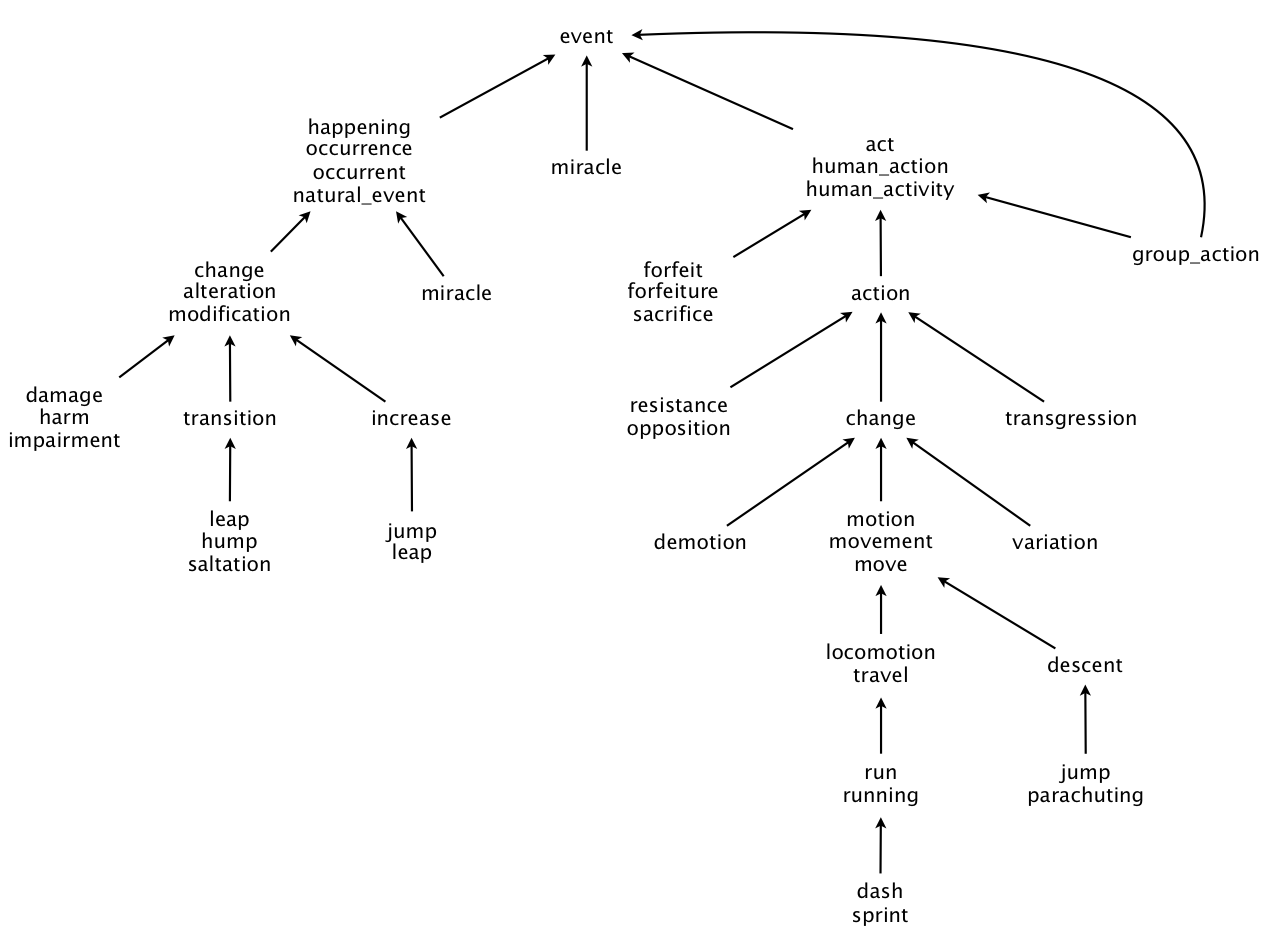
Resource: https://wordnet.princeton.edu/

In [249]:
# Defining supporting function for changing POS of NLTK to POS of Wordnet
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN


In [250]:
# Extracting POS of tokens
df['wordnet_pos'] = df['defualt_postag'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])
df.head()

ID  ...                                        wordnet_pos
0  31035514  ...  [(as, n), (many, a), (of, n), (us, n), (are, v...
1  31035514  ...  [(stacey, a), (abrams, n), (while, n), (work, ...
2  31035514  ...  [(author, n), (jenniferiryan, n), (is, v), (po...
3  31035514  ...  [(happy, a), (international, a), (womens, n), ...
4  31035514  ...  [(learn, n), (about, n), (strength, n), (amp, ...

[5 rows x 21 columns]

In [251]:
df[['defualt_postag','wordnet_pos']]

defualt_postag                                        wordnet_pos
0     [(as, IN), (many, JJ), (of, IN), (us, PRP), (a...  [(as, n), (many, a), (of, n), (us, n), (are, v...
1     [(stacey, JJ), (abrams, NNS), (while, IN), (wo...  [(stacey, a), (abrams, n), (while, n), (work, ...
2     [(author, NN), (jenniferiryan, NN), (is, VBZ),...  [(author, n), (jenniferiryan, n), (is, v), (po...
3     [(happy, JJ), (international, JJ), (womens, NN...  [(happy, a), (international, a), (womens, n), ...
4     [(learn, NN), (about, IN), (strength, NN), (am...  [(learn, n), (about, n), (strength, n), (amp, ...
...                                                 ...                                                ...
6487  [(songs, NNS), (stories, NNS), (and, CC), (oth...  [(songs, n), (stories, n), (and, n), (other, a...
6488  [(while, IN), (our, PRP$), (new, JJ), (expande...  [(while, n), (our, n), (new, a), (expanded, v)...
6489  [(tick, NN), (tock, NN), (the, DT), (doomsdayc...  [(tick, n), (tock, n), (the, n), (doomsdaycloc...
6490  [(keep, VB), (your, PRP$), (eye, NN), (on, IN)...  [(keep, v), (your, n), (eye, n), (on, n), (oli...
6491  [(davidalangay, NN), (thats, VBZ), (a, DT), (g...  [(davidalangay, n), (thats, v), (a, n), (great...

[6492 rows x 2 columns]

In [252]:
# lemmatizating tokens using WordNetLemmatizer:

from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()

df['lemmatized_words']=df['wordnet_pos'].apply(lambda x: [lemmatizer.lemmatize(word, tag) for word, tag in x])

df['lemmatized_text']=[' '.join(map(str,i)) for i in df['lemmatized_words']]
df.head()

ID  ...                                    lemmatized_text
0  31035514  ...  a many of u be dream of travel in a healthy po...
1  31035514  ...  stacey abrams while work against voter suppres...
2  31035514  ...  author jenniferiryan be popular her two previo...
3  31035514  ...  happy international woman day this be just a r...
4  31035514  ...  learn about strength amp heal through the art ...

[5 rows x 23 columns]

In [253]:
print(df['text1'].iloc[4])
print(df['Clean_text'].iloc[4])
print(df['lemmatized_text'].iloc[4])

learn about strength amp healing through the arts at this panel discussion and free screening of the acclaimed short docum…
learn about strength amp heal through the art at thi panel discuss and free screen of the acclaim short docum
learn about strength amp heal through the art at this panel discussion and free screening of the acclaimed short docum…



---




# 3- Exploratory Data Analysis (EDA):

---


### 3-1 Hashtags Frequency


In [254]:
df.head()

ID  ...                                    lemmatized_text
0  31035514  ...  a many of u be dream of travel in a healthy po...
1  31035514  ...  stacey abrams while work against voter suppres...
2  31035514  ...  author jenniferiryan be popular her two previo...
3  31035514  ...  happy international woman day this be just a r...
4  31035514  ...  learn about strength amp heal through the art ...

[5 rows x 23 columns]

In [255]:
# Finding most frequent hashtgags
# value_counts function return a Series containing counts of unique values.
df['hashtags'].value_counts()

85Queen                 41
STMY                    37
kwawesome               31
bookadventcalendar      16
ThrowbackThursday       10
                        ..
COVID19                  1
thatsjustbananas         1
PaperBagPrincessDay      1
Ridgerunner              1
dollypartonchallenge     1
Name: hashtags, Length: 477, dtype: int64

In [256]:
number_hashtags=20
hashtags_freq=df['hashtags'].value_counts()[:number_hashtags]
hashtags_freq

85Queen               41
STMY                  37
kwawesome             31
bookadventcalendar    16
ThrowbackThursday     10
RemembranceDay         9
KWAwesome              9
belongtogetherWR       9
FamilyLiteracyKW       8
HarryPotter            8
booklovers             8
Pride                  8
librarylove            8
85Green                7
BellLetsTalk           6
IWD2019                6
BigLibraryRead         6
BlackHistoryMonth      6
MadeInHeffner          6
85queen                5
Name: hashtags, dtype: int64

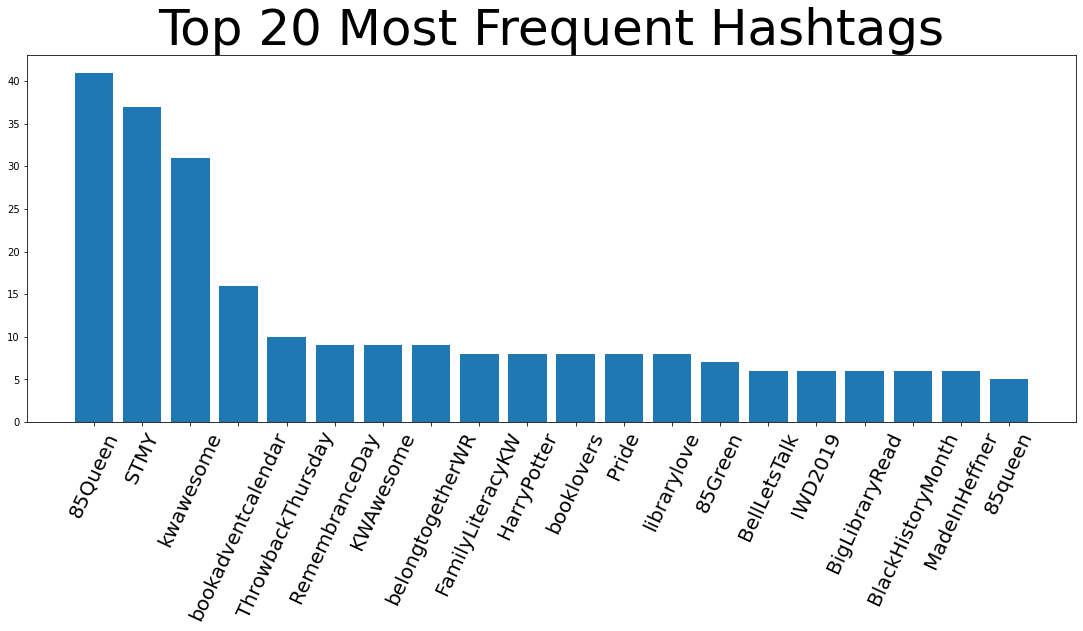

In [257]:
# Plot a bar chart showing top most frequent Hashtags
fig = plt.figure(figsize=(15,6))

plt.title(f'Top {number_hashtags} Most Frequent Hashtags', fontsize=50, )
plt.tight_layout(pad=0)

plt.bar(x=hashtags_freq.index,height=hashtags_freq.values)
plt.xticks(fontsize=20, rotation='65')
plt.show()


In [258]:
# The function returns results in the descending order for values.
# The order can be changed by setting ascending parameters to True
df['hashtags'].value_counts(ascending=True)

dollypartonchallenge     1
Ridgerunner              1
PaperBagPrincessDay      1
thatsjustbananas         1
COVID19                  1
                        ..
ThrowbackThursday       10
bookadventcalendar      16
kwawesome               31
STMY                    37
85Queen                 41
Name: hashtags, Length: 477, dtype: int64

### 3-2- Retweeted tweets Frequency
"retweet_count" is the column that shows the number of likes for each tweet

In [259]:
# sort_values orders the dataset in terms of a give column.
hastags_most_retweeted=df.sort_values('retweet_count',ascending=False).iloc[:200]
hastags_most_retweeted.head()

ID  ...                                    lemmatized_text
235    31035514  ...  today every view of this video help create pos...
6154  425118862  ...             you come at the king you best not miss
3226   31035514  ...  “ well i be tell you there be hope i have see ...
1937   31035514  ...  on our street we accept all we love all and we...
6084  425118862  ...  if you be or be the friendly gent blue coat wh...

[5 rows x 23 columns]

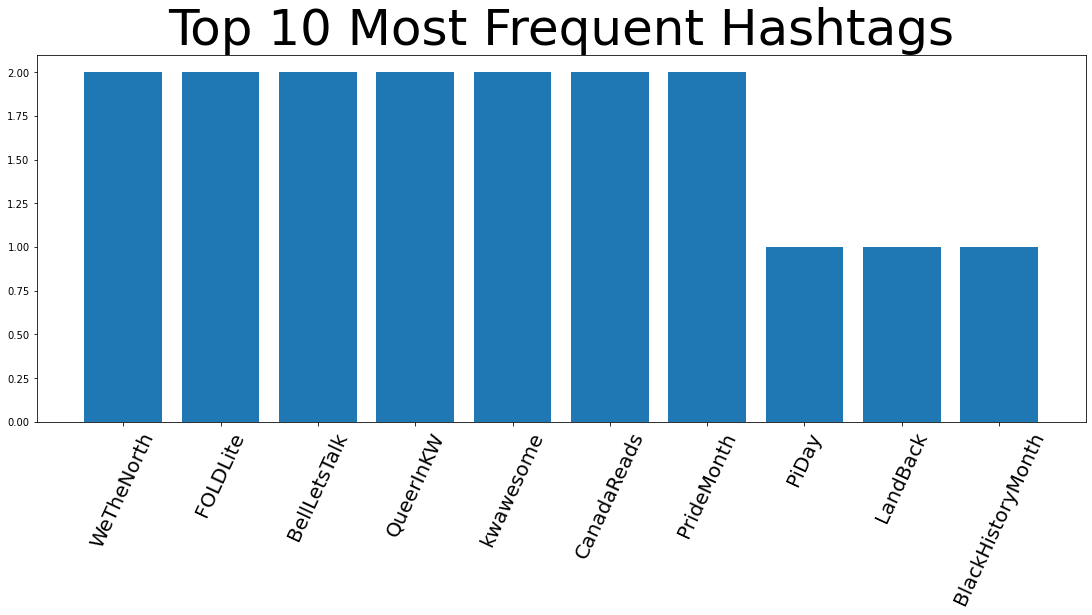

In [260]:
# Ploting a bar chart shows the top most frequent hashtags for top retweeted tweets.
hastags_most_liked=df.sort_values('retweet_count',ascending=False).iloc[:200]

hashtags_freq=hastags_most_liked['hashtags'].value_counts()[0:10]

fig = plt.figure(figsize=(15,6))
#plt.axis('off')
plt.title('Top 10 Most Frequent Hashtags', fontsize=50, )
plt.tight_layout(pad=0)
#plt.xticks(hashtags_freq.index)
plt.bar(x=hashtags_freq.index,height=hashtags_freq.values)
plt.xticks(fontsize=20, rotation = '65')
plt.show()


#### **Practice time:**
Find the 100 most liked tweets? The dataframe should show the text and the number of likes for each tweets.

In [261]:
# solution:
df.sort_values('favorite_count',ascending=False).iloc[:100][['text','favorite_count']]

text  favorite_count
3455  It's official! No more overdue fines, ever! 🙌🥳...             587
4516  Thank you to everyone who reached out to us ab...             425
4969  Access to menstrual products just got a little...             403
3493  Be careful what you wish for 😉\n\nPictured: 85...             363
6425  Should the person who did this be fired y/n ht...             291
...                                                 ...             ...
4865  We had a special surprise for @berryonline tod...              38
4569  Have a device? Have a library card? Great! Tha...              37
4780  Pro tip: Use your library card to 3D print you...              37
4657  Say hello to our growing greens! We've got let...              37
6398  All Kitchener Public Library locations are clo...              36

[100 rows x 2 columns]

#### Practice time:
Write a code to extract 10 most frequent hashtags from 200 most liked tweets and use bar chart to show them? 

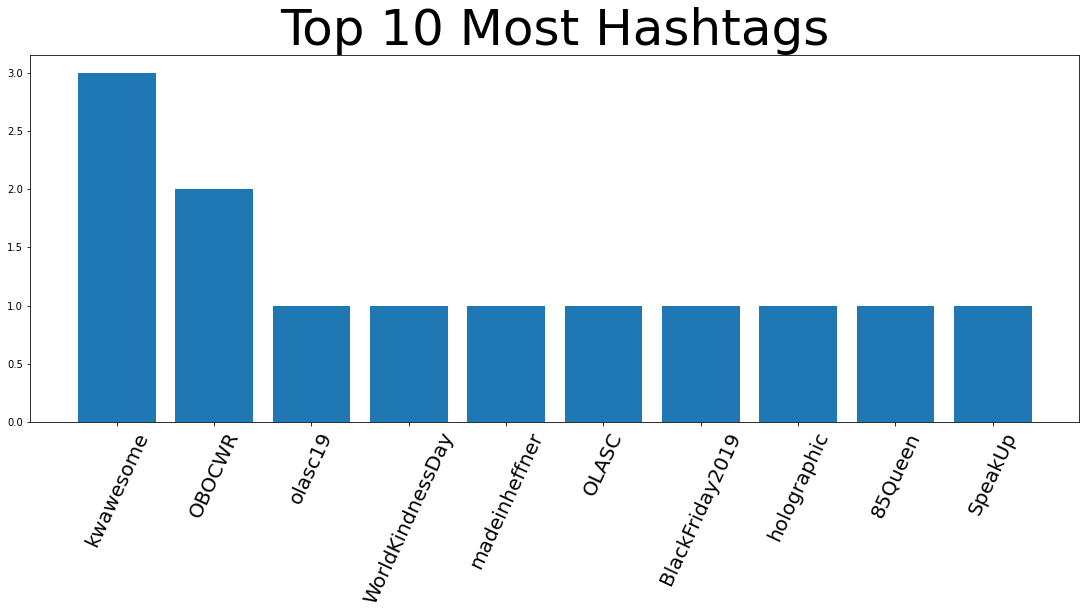

In [262]:
# Solution:

hastags_most_liked=df.sort_values('favorite_count',ascending=False).iloc[:200]

hashtags_freq=hastags_most_liked['hashtags'].value_counts()[0:10]

fig = plt.figure(figsize=(15,6))
#plt.axis('off')
plt.title('Top 10 Most Hashtags', fontsize=50, )
plt.tight_layout(pad=0)
#plt.xticks(hashtags_freq.index)
plt.bar(x=hashtags_freq.index,height=hashtags_freq.values)
plt.xticks(fontsize=20, rotation = '65')
plt.show()


### 3-3- Tweet likes Frequency
"favorite_count" is the column that shows the number of likes for each tweet

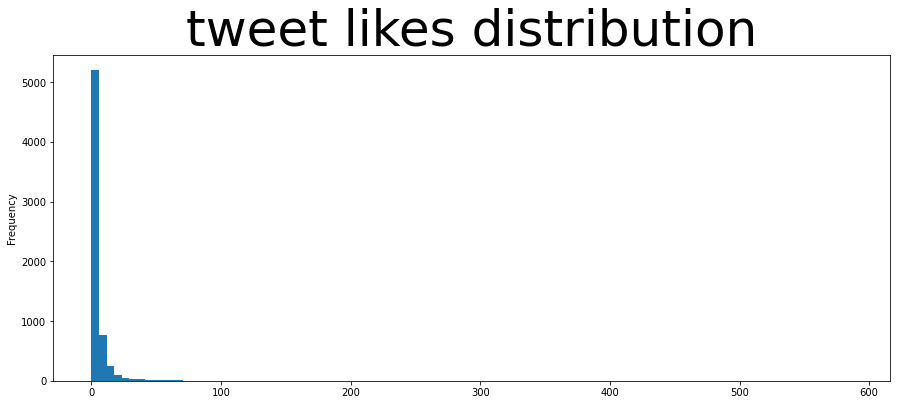

In [263]:
# Plot a hsitogram showing the distribution of tweets likes
# Histogram A histogram is a graphical display of data using bars of different heights. In a histogram, each bar groups numbers into ranges. 
# Taller bars show that more data falls in that range. A histogram displays the shape and spread of continuous sample data. (Resource: Khanacademy.org)

fig = plt.figure(figsize=(15,6))
plt.title('tweet likes distribution', fontsize=50)
df['favorite_count'].plot.hist(bins=100)

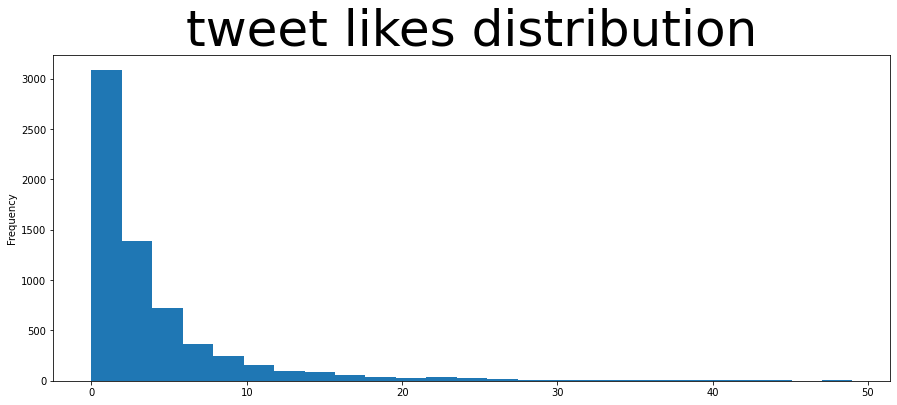

In [264]:
# Removing outliers and ploting a hsitogram showing the distribution of tweets likes 
# To get a better understanding of likes distribution, likes more that 50 are revmoved.

fig = plt.figure(figsize=(15,6))
plt.title('tweet likes distribution', fontsize=50, )
df[df['favorite_count']<50]['favorite_count'].plot.hist(bins=25)

### 3-4- Number of Hashtags in a tweet vs the Number of likes it got

In [265]:
# Group by a column
df.groupby('hashtags')

In [266]:
# aggregate values for a group by
df.groupby('hashtags').agg({'favorite_count': np.sum})

favorite_count
hashtags                                    
1eReadLivrelCanada                         0
2009v2019                                131
2021Census                                 0
365ofgoodWR                                0
3Dprint                                    0
...                                      ...
wrdsbesl                                   0
writers                                    1
youngreadersarefutureleaders               2
ywkw                                       0
zoo                                        0

[477 rows x 1 columns]

In [267]:
# Sorting a group by dataframe
df.groupby('hashtags').agg({'favorite_count': np.sum}).sort_values('favorite_count', ascending=False)

favorite_count
hashtags                          
kwawesome                      708
STMY                           246
85Queen                        223
2009v2019                      131
OBOCWR                          73
...                            ...
TurtleTuesday                    0
UWaterloo                        0
UWaterloo3MT                     0
UWaterlooCommunity               0
zoo                              0

[477 rows x 1 columns]

### 3-5- Comparing Kitchener and Waterloo Libraries: 

In [268]:
screen_name=df.groupby('screen_name').agg({'favorite_count':np.mean})
screen_name.head(5)


favorite_count
screen_name                    
KitchLibrary           6.293864
WaterlooLibrary        2.971684

#### Practice time:
Using screen_name, group data by and compare Kichener and Waterloo libraries in terms of the average number of likes, retweets, the number of followers, and friends. Show the results in a framework.


In [269]:
# Solution:
screen_name=df.groupby('screen_name').agg({'favorite_count':np.mean,'retweet_count': np.mean, 'followers_count': np.mean, 'friends_count': np.mean})
screen_name.head()

favorite_count  retweet_count  followers_count  friends_count
screen_name                                                                   
KitchLibrary           6.293864      37.942646     12475.981499           2975
WaterlooLibrary        2.971684      60.691290      8039.012311           7169

### 3-6- Characteristics of tweets:

In [270]:
print('The average of the number of words',df['num_words'].mean())
print('The average of the number of chars',df['num_chars'].mean())
print('The variance of the number of words',df['num_words'].var())
print('The variance of the number of chars',df['num_chars'].var())

The average of the number of words 18.893869377695626
The average of the number of chars 128.4730437461491
The variance of the number of words 26.345074102793546
The variance of the number of chars 742.4264801502966


#### Characteristics of most liked tweets:

In [271]:
hashtags_most_liked=df.sort_values('favorite_count',ascending=False).iloc[:100]

In [272]:
print('The average of the number of words',hashtags_most_liked['num_words'].mean())
print('The average of the number of chars',hashtags_most_liked['num_chars'].mean())
print('The variance of the number of words',hashtags_most_liked['num_words'].var())
print('The variance of the number of chars',hashtags_most_liked['num_chars'].var())

The average of the number of words 19.3
The average of the number of chars 126.75
The variance of the number of words 54.797979797979814
The variance of the number of chars 667.7853535353536


#### Practice time:
Find a average and variance for of the num words for the 100 least liked tweets.  

In [273]:
# Solution: 
hashtags_least_liked=df.sort_values('favorite_count',ascending=True).iloc[:100]
print('The average of the number of words',hashtags_least_liked['num_words'].mean())
print('The average of the number of chars',hashtags_least_liked['num_chars'].mean())
print('The variance of the number of words',hashtags_least_liked['num_words'].var())
print('The variance of the number of chars',hashtags_least_liked['num_chars'].var())

The average of the number of words 19.32
The average of the number of chars 128.94
The variance of the number of words 31.99757575757577
The variance of the number of chars 842.905454545456


## 3-6- wordcloud
wordcloud is a python library for visulazing the frequency of words
Methods

**Some parameters that can be used to change the output:**
*    max_words,
*    max_font_size,
*    stopwords,

A very good resouce:
https://www.datacamp.com/community/tutorials/wordcloud-python


### Most Common Words

Creating wordcloud....
Running wordcloud may take a few minutes. Please wait.


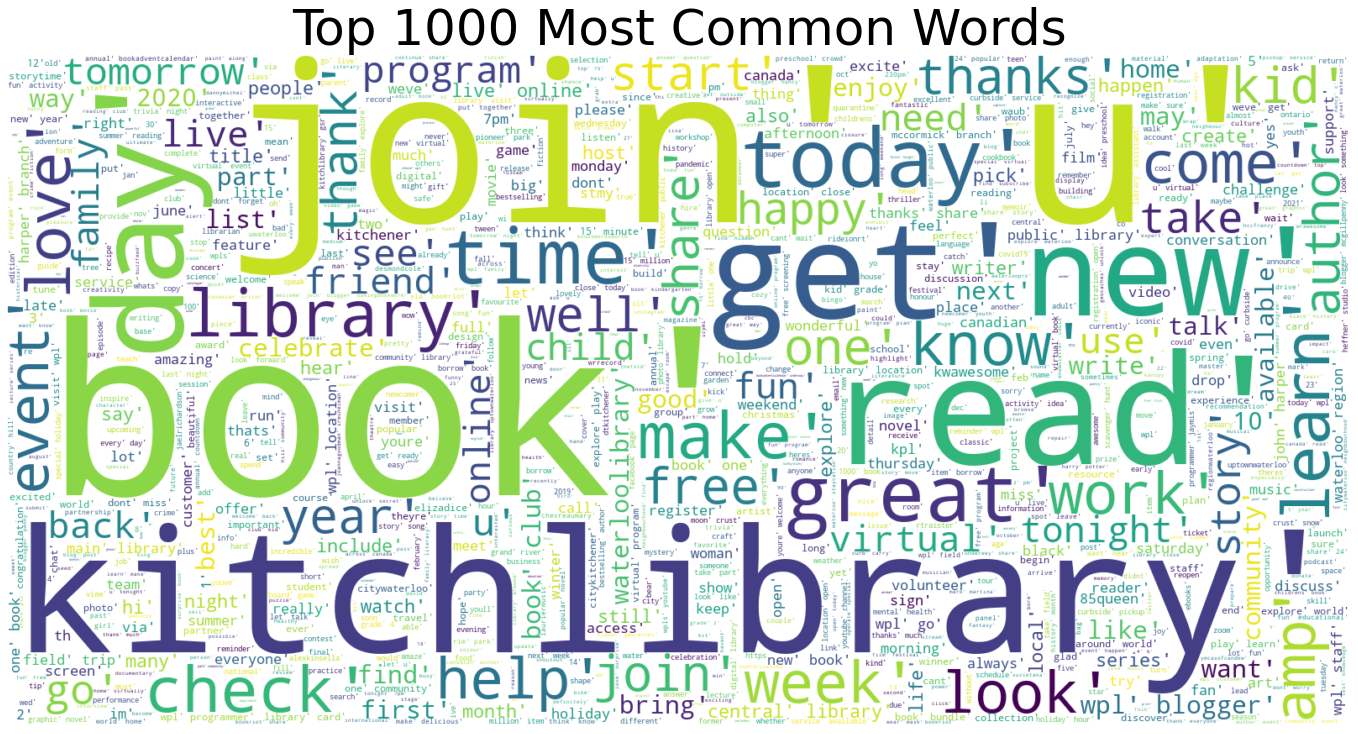

In [274]:
# Running this cell may take a few minutes
from wordcloud import WordCloud
from nltk.corpus import stopwords

# Removing stop words
stop = set(stopwords.words('english'))
df['lemmatized_words_no_stop'] = df['lemmatized_words'].apply(lambda x: [word for word in x if word not in stop])

# adding all tokens to create a list of tokens
words = df['lemmatized_words_no_stop']
allwords = []
for wordlist in words:
    allwords += wordlist


# you can change the number of words you wan to be displayed
max_words=1000
print('Creating wordcloud....')
print('Running wordcloud may take a few minutes. Please wait.')
wordcloud = WordCloud(width=1600, height=800,
                      max_words=max_words,
                      background_color='white',
                      ).generate(str(allwords))
fig = plt.figure(figsize=(30,10))
plt.imshow(wordcloud, interpolation="bilinear")

# See https://matplotlib.org/stable/gallery/images_contours_and_fields/interpolation_methods.html to find more interpolation

plt.axis('off')
plt.title(f'Top {max_words} Most Common Words', fontsize=50)
plt.tight_layout(pad=0)
plt.show()


# 4- Sentiment Analysis

## 4-1- Sentiment Analysis- Word Level

We can determine how many positive and negative words are being used in each tweet by comparing them to a predefined list of words.                             
This helps us in using external data to help build features.

We borrowed our list of pos/neg words from this study: 
https://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html


In [275]:
pos_words = pd.read_csv('https://raw.githubusercontent.com/nick-wcd/cbc/master/positive-words.txt', skiprows=35, names=['words'])
pos_words = pos_words['words'].values.tolist()

#pos_words

In [276]:
neg_words = pd.read_csv('https://raw.githubusercontent.com/nick-wcd/cbc/master/negative-words.txt', skiprows=35, names=['words'])
neg_words = neg_words['words'].values.tolist()

#neg_words

In [277]:
len(neg_words)

4783

In [278]:
# defining a suporting fuction for counting the number of positive and negative words
def count_words(tweet, words):
    count = 0
    for word in tweet.split():
        if word in words:
            count += 1
    return count

In [279]:
# count the number of positive and negative words in each tweet
df['pos_count'] = df['lemmatized_text'].apply(count_words, words=pos_words)
df['neg_count'] = df['lemmatized_text'].apply(count_words, words=neg_words)

In [280]:
df.head()

ID          created_at  ... pos_count neg_count
0  31035514 2021-03-16 23:00:00  ...         1         0
1  31035514 2021-03-16 18:00:00  ...         1         1
2  31035514 2021-03-16 17:00:01  ...         1         0
3  31035514 2021-03-16 15:59:32  ...         1         0
4  31035514 2021-03-16 15:57:42  ...         3         0

[5 rows x 26 columns]

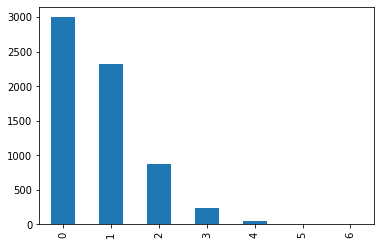

In [281]:
# Plotting the frequency of positive words in tweets
df['pos_count'].value_counts().plot.bar()

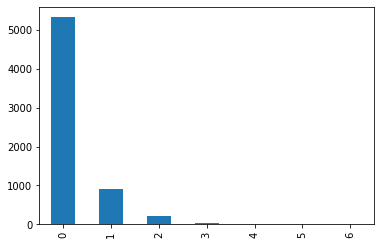

In [282]:
# Plotting the frequency of negative words in tweets
df['neg_count'].value_counts().plot.bar()

## 4-2- Sentiment analysis- Document Level


**Sentiment analysis** is the process of determining the writer’s attitude or opinion ranging from -1 (negative attitude) to 1 (positive attitude). We’ll be using the TextBlob library to analyze sentiment. TextBlob’s Sentiment() function requires a string.


**TextBlob** is a Python library for processing textual data. It provides an API for di common natural language processing (NLP) tasks such as **part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation**, and more.


*   PatternAnalyzer - a default classifier that is built on the pattern library

    **Note: rules-based sentiment scores**

***Polarity*** is a float value within the range [-1.0 to 1.0] where 0 indicates neutral, +1 indicates a very positive sentiment and -1 represents a very negative sentiment.

***Subjectivity*** is a float value within the range [0.0 to 1.0] where 0.0 is very objective and 1.0 is very subjective. Subjective sentence expresses some personal feelings, views, beliefs, opinions, allegations, desires, beliefs, suspicions, and speculations where as Objective sentences are factual

*   NaiveBayesAnalyzer - an NLTK model trained on a movie reviews corpus

NaiveBayesAnalyzer returns its result as a namedtuple of the form: Sentiment(classification, p_pos, p_neg)

resource: https://textblob.readthedocs.io/en/dev/advanced_usage.html




In [283]:
from textblob import TextBlob
TextBlob('I love twitter').sentiment

Sentiment(polarity=0.5, subjectivity=0.6)

In [284]:
TextBlob('I do not love twitter').sentiment

Sentiment(polarity=-0.25, subjectivity=0.6)

In [285]:
# polarity and subjectivity can be seperated
print(TextBlob('I do not love twitter').sentiment.polarity)
print(TextBlob('I do not love twitter').sentiment.subjectivity)

-0.25
0.6


In [286]:
# Calculating polarity for tweets
df['sentiment']= df['lemmatized_text'].apply(lambda x: TextBlob(x).sentiment.polarity)
df.head()

ID          created_at  ... neg_count sentiment
0  31035514 2021-03-16 23:00:00  ...         0  0.500000
1  31035514 2021-03-16 18:00:00  ...         1  0.000000
2  31035514 2021-03-16 17:00:01  ...         0  0.144444
3  31035514 2021-03-16 15:59:32  ...         0  0.400000
4  31035514 2021-03-16 15:57:42  ...         0  0.200000

[5 rows x 27 columns]

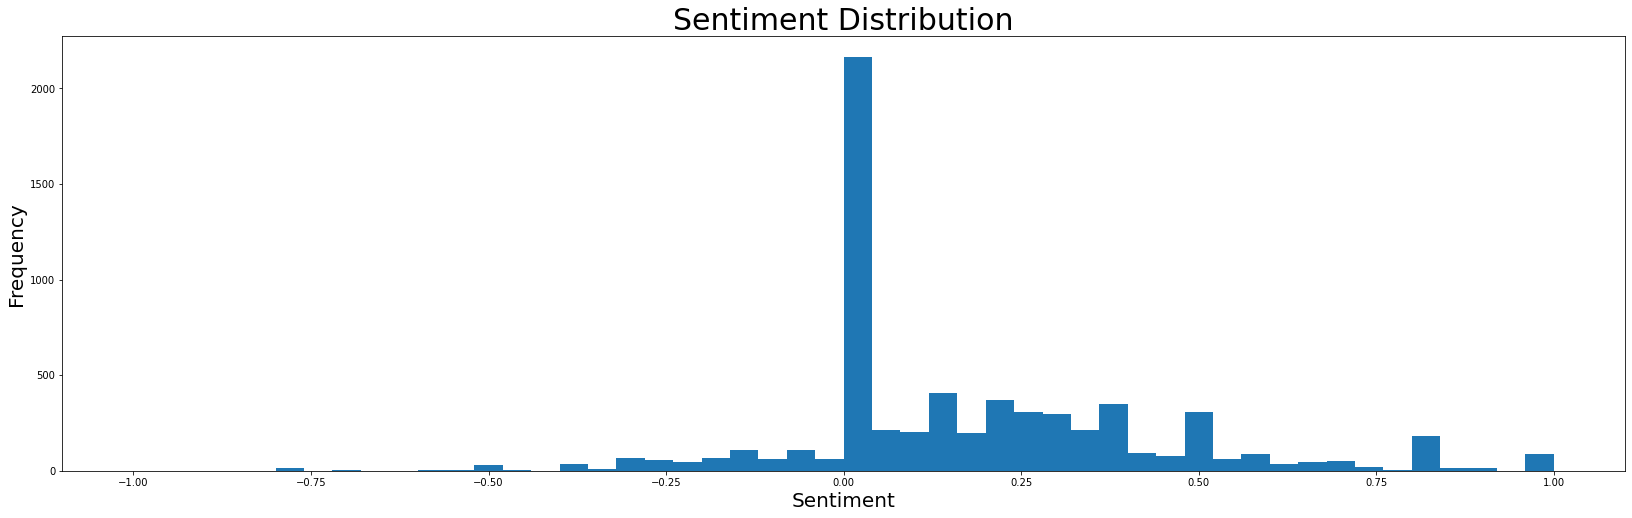

In [287]:
plt.figure(figsize=(28,8))
#plt.margins(0.02)
plt.xlabel('Sentiment', fontsize=20)
plt.xticks(fontsize=10)
plt.ylabel('Frequency', fontsize=20)
plt.yticks(fontsize=10)
plt.hist(df['sentiment'], bins=50)
plt.title('Sentiment Distribution', fontsize=30)
plt.show()

Let`s have a look at poitive tweets:

In [288]:
df[df['sentiment']>.7]['text'].iloc[2]

'Anne Lamott on Writing a Book for Those Feeling Hopeless. @lithub\nasked the best selling author five questions, inc… https://t.co/Kb7b14K9cY'

And negative tweets

In [289]:
df[df['sentiment']<-.7]['text'].iloc[0]

'The Humboldt crash was a horrible tragedy felt all across Canada. @KalebDahlgren , Humboldt crash survivor, has a n… https://t.co/vz4jYwe69v'

### Most Frequent words with positive sentiment

Creating wordcloud....
Running wordcloud may take a few minutes. Please wait.


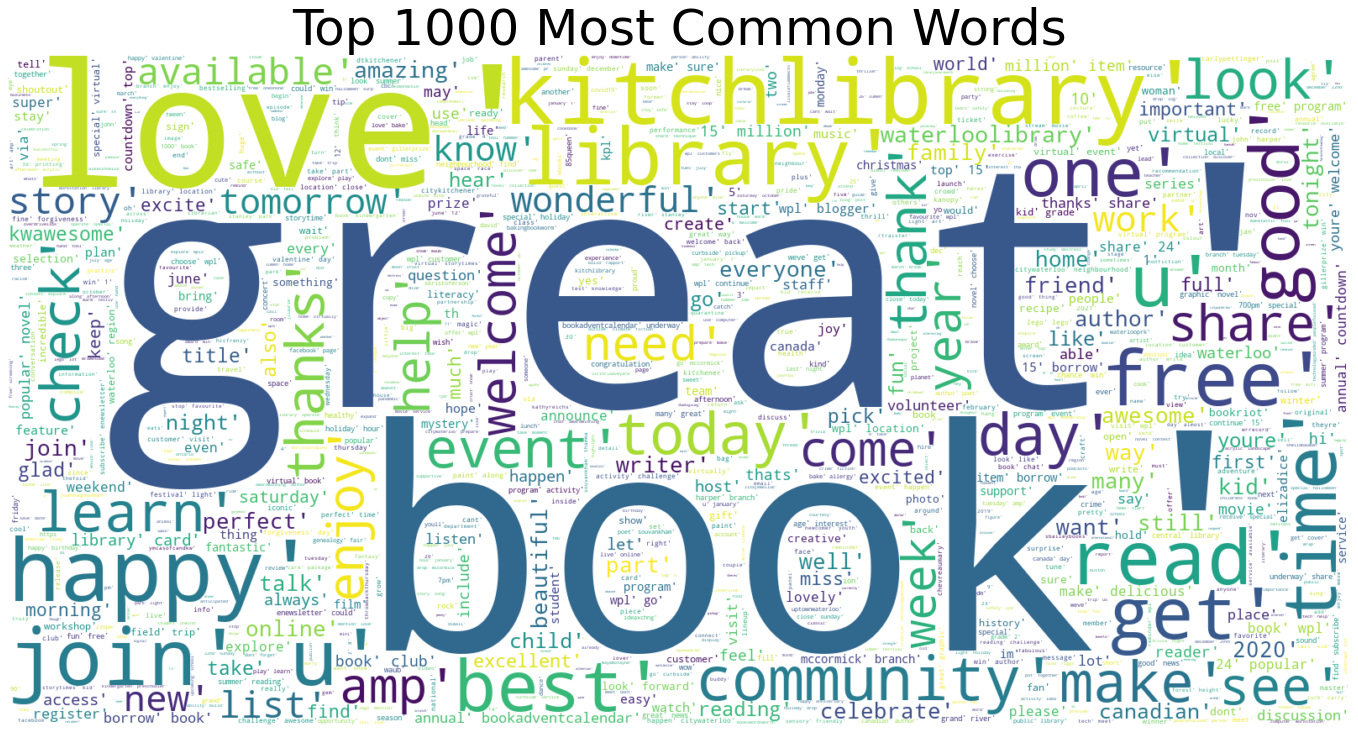

In [290]:
words = df[df['sentiment']>0.33]['lemmatized_words_no_stop']
allwords = []
for wordlist in words:
    allwords += wordlist

wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(str(words))
# you can change the number of words you wan to be displayed
max_words=1000
print('Creating wordcloud....')
print('Running wordcloud may take a few minutes. Please wait.')
wordcloud = WordCloud(width=1600, height=800,
                      max_words=max_words,
                      background_color='white',
                      ).generate(str(allwords))




fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title(f'Top {max_words} Most Common Words', fontsize=50)
plt.tight_layout(pad=0)
plt.show()

### Most Fequent words with negative sentiment

Creating wordcloud....
Running wordcloud may take a few minutes. Please wait.


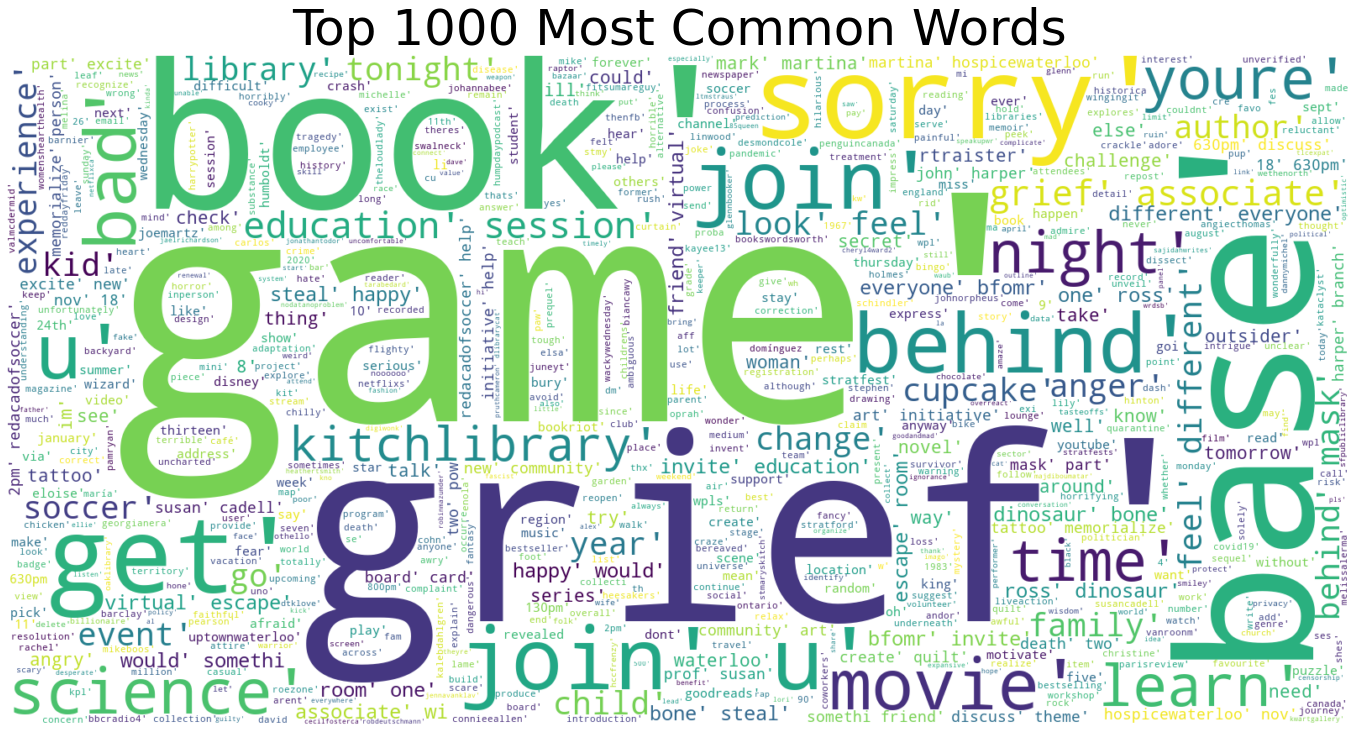

In [291]:
words = df[df['sentiment']<-0.33]['lemmatized_words_no_stop']
allwords = []
for wordlist in words:
    allwords += wordlist

wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(str(words))

wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(str(words))
# you can change the number of words you wan to be displayed
max_words=1000
print('Creating wordcloud....')
print('Running wordcloud may take a few minutes. Please wait.')
wordcloud = WordCloud(width=1600, height=800,
                      max_words=max_words,
                      background_color='white',
                      ).generate(str(allwords))



fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title(f'Top {max_words} Most Common Words', fontsize=50)
plt.tight_layout(pad=0)
plt.show()

### Characteristics of positive and negative tweets 

In [292]:
positive_tweets= df[df['sentiment']>0.33]
print('The average of the number of words',positive_tweets['num_words'].mean())
print('The average of the number of chars',positive_tweets['num_chars'].mean())
print('The variance of the number of words',positive_tweets['num_words'].var())
print('The variance of the number of chars',positive_tweets['num_chars'].var())

The average of the number of words 18.81868811881188
The average of the number of chars 127.61819306930693
The variance of the number of words 23.43521710143148
The variance of the number of chars 681.2665171044998


In [293]:
negative_tweets=df[df['sentiment']<-0.33]
print('The average of the number of words',negative_tweets['num_words'].mean())
print('The average of the number of chars',negative_tweets['num_chars'].mean())
print('The variance of the number of words',negative_tweets['num_words'].var())
print('The variance of the number of chars',negative_tweets['num_chars'].var())

The average of the number of words 19.39090909090909
The average of the number of chars 128.62727272727273
The variance of the number of words 18.992577147623017
The variance of the number of chars 629.7955796497081


# 5- Topic Modeling
**Topic Modeling:** Topic Modeling strives to automatically discovers the hidden themes from given documents. It is an unsupervised text analytics algorithm that is used for finding the group of words from the given document. These group of words represents a topic. There is a possibility that, a single document can associate with multiple themes.


**Latent Semantic Analysis (LSA):** One of the oldest and most common techniques tor topic modeling

**Latent Dirichlet Allocation (LDA):** Latent Dirichlet Allocation is an technique for topic modeling and is used to classify text in a document to a particular topic. It builds a topic per document model and words per topic model, modeled as Dirichlet distributions.


In [294]:
# importing libraries
import gensim
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

**Documents-Terms matrix**
Documents-Terms matrix is a mathematical matrix that describes the frequency of terms that occur in a collection of document. it is used as an input for topic modeling techniqeus.

Types of Documents-Terms matrices:
*   Raw counts: CountVectorizer
*   Term Frequency–Inverse Document Frequency (TF-IDF) : is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus (TfidfVectorizer)

Example of documents- Terms matrix"

Document 1: I live in Waterloo. I work in Kitchener.

Document 2: I live in Kitchener. Kitchener is a good place to live.

Document 3: I am working on Topic Modeling in twitter.



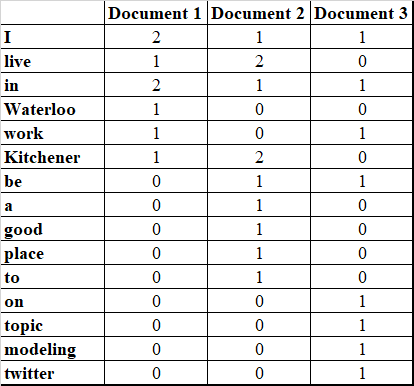




In [295]:
# Use CountVectorizor or TfidfVectorizer to find three letter tokens, remove stop_words, 
# remove tokens that don't appear in at least 20 documents,
# remove tokens that appear in more than 20% of the documents

# Raw Counts
# vect = CountVectorizer(ngram_range=(1,2),
#                       min_df=20, 
#                       max_df=0.2, 
#                       stop_words='english', 
#                       )

# TF-IDF
vect=TfidfVectorizer(lowercase=True,
                     ngram_range=(1,2),
                     min_df=10,
                     max_df=0.2,
                     stop_words='english')
# Fit and transform
X = vect.fit_transform(df['lemmatized_text'])

# Convert sparse matrix to gensim corpus.
corpus = gensim.matutils.Sparse2Corpus(X, documents_columns=False)

# Mapping from word IDs to words (To be used in LdaModel's id2word parameter)
id_map = dict((v, k) for k, v in vect.vocabulary_.items())


## 5-1- Latent Semantic Analysis (LSA)

In [296]:
from gensim.models.lsimodel import LsiModel
lsimodel=LsiModel(corpus, num_topics=3, id2word=id_map)
lsimodel.print_topics()

[(0,
  '-0.389*"book" + -0.231*"library" + -0.189*"join" + -0.186*"read" + -0.176*"kitchlibrary" + -0.172*"new" + -0.169*"thanks" + -0.146*"share" + -0.139*"wpl" + -0.133*"day"'),
 (1,
  '0.776*"thanks" + 0.372*"thanks share" + 0.368*"share" + -0.228*"book" + -0.088*"read" + -0.066*"new" + -0.053*"wpl" + 0.045*"thanks come" + -0.044*"club" + -0.042*"online"'),
 (2,
  '0.640*"book" + -0.368*"library" + 0.240*"read" + -0.129*"kitchlibrary" + -0.127*"today" + -0.126*"join" + 0.120*"thanks" + -0.110*"central" + -0.109*"learn" + -0.102*"central library"')]

In [297]:
# calculating coherence score values for diffrent number of topics:
from gensim.models.coherencemodel import CoherenceModel
coherence_values = []
model_list = []
for num_topics in range (1,10):
  # generate LSA model
  model = LsiModel(corpus, num_topics=num_topics, id2word=id_map)
  model_list.append(model)
  coherencemodel= CoherenceModel(model=model, corpus=corpus, dictionary=id_map, coherence='u_mass')
  coherence_values.append(coherencemodel.get_coherence())

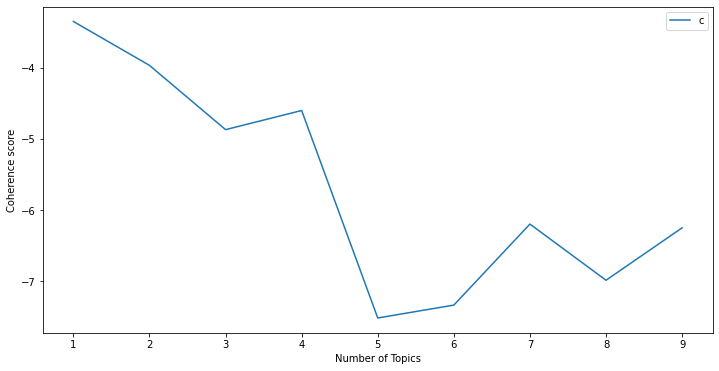

In [298]:
# Plotting coherence score values
fig = plt.figure(figsize=(12,6))
x= range (1,10)
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='upper right')
plt.show()

In [299]:
lsimodel=LsiModel(corpus, num_topics=5, id2word=id_map)
lsimodel.print_topics()

[(0,
  '0.389*"book" + 0.231*"library" + 0.190*"join" + 0.187*"read" + 0.176*"kitchlibrary" + 0.172*"new" + 0.170*"thanks" + 0.145*"share" + 0.139*"wpl" + 0.133*"day"'),
 (1,
  '-0.773*"thanks" + -0.374*"thanks share" + -0.370*"share" + 0.227*"book" + 0.091*"read" + 0.069*"new" + 0.052*"wpl" + 0.047*"club" + -0.045*"thanks come" + 0.042*"author"'),
 (2,
  '-0.641*"book" + 0.365*"library" + -0.239*"read" + 0.127*"kitchlibrary" + 0.127*"today" + 0.123*"join" + -0.123*"thanks" + 0.111*"central" + 0.108*"learn" + 0.105*"free"'),
 (3,
  '-0.581*"library" + 0.331*"join" + 0.252*"kitchlibrary" + -0.170*"book" + 0.153*"thank" + 0.152*"learn" + 0.144*"live" + 0.140*"virtual" + 0.137*"event" + -0.122*"central library"'),
 (4,
  '-0.799*"thank" + -0.330*"kitchlibrary" + 0.196*"join" + 0.114*"wpl" + -0.112*"love" + 0.107*"learn" + 0.102*"live" + 0.097*"thanks" + 0.090*"virtual" + -0.085*"community"')]

## 5-2- Latent Dirichlet Allocation (LDA):

In [ ]:
# Use the gensim.models.ldamodel.LdaModel constructor to estimate 
# LDA model parameters on the corpus, and save to the variable `ldamodel`

from gensim.models.ldamodel import LdaModel
ldamodel = LdaModel(corpus, num_topics=3, id2word=id_map, passes=10, random_state=34)
ldamodel.print_topics()
#ldamodel.show_topics(num_topics=10, num_words=10, log=False, formatted=True)

[(0,
  '0.018*"kitchlibrary" + 0.011*"library" + 0.010*"love" + 0.010*"books" + 0.009*"new" + 0.009*"central" + 0.009*"day" + 0.008*"pm" + 0.008*"im" + 0.007*"time"'),
 (1,
  '0.027*"thanks" + 0.018*"thank" + 0.010*"library" + 0.010*"great" + 0.009*"youre" + 0.009*"belongtogetherwr" + 0.009*"rtraister" + 0.009*"amazing" + 0.008*"sharing" + 0.008*"good"'),
 (2,
  '0.014*"join" + 0.010*"85queen" + 0.008*"kitchlibrary" + 0.008*"march" + 0.007*"tonight" + 0.007*"book" + 0.007*"event" + 0.007*"live" + 0.006*"coming" + 0.006*"free"')]

### LDA: Parameters Fine Tuning
Parameters that cane be modified:
*    The number of topics
*    The part of speech:

     *One popular way is to look only at terms that are from one part of speech (nouns, verbs,or adjectives). Then add more to find if meaningful topics appears.*
*    The number of passes:

      *Increasing the number of passess results in more robust words distributions.*

**LDA for noun words**

In [ ]:
# creating a list of Nouns
df['nouns']=df['defualt_postag'].apply(lambda x:[word for (word,pos) in x if pos == 'NN'])
df['nouns']=[' '.join(map(str,i)) for i in df['nouns']]
df['nouns']

0       work suppression voting time thriller justice ...
1                            author jenniferiryan book b…
2                                       day reminder page
3       learn strength amp panel discussion screening ...
4                                   staycation staff wee…
                              ...                        
6487                     mill community centre pm kpl fu…
6488       heffnerstudio construction learning temporary…
6489                              tick tock doomsdayclock
6490                                      eye olivia work
6491                                davidalangay question
Name: nouns, Length: 6492, dtype: object

In [ ]:
# Number of topics =2 
vect = CountVectorizer(ngram_range=(1,2),
                       min_df=20, 
                       max_df=0.2, 
                       stop_words='english' 
                       )
#vect=TfidfVectorizer(lowercase=True,ngram_range=(1,2),min_df=10, max_df=0.2, stop_words='english', 
#                       token_pattern='(?u)\\b\\w\\w\\w+\\b')
# Fit and transform
X = vect.fit_transform(df['nouns'])

# Convert sparse matrix to gensim corpus.
corpus = gensim.matutils.Sparse2Corpus(X, documents_columns=False)

# Mapping from word IDs to words (To be used in LdaModel's id2word parameter)
id_map = dict((v, k) for k, v in vect.vocabulary_.items())
# Use the gensim.models.ldamodel.LdaModel constructor to estimate 
# LDA model parameters on the corpus, and save to the variable `ldamodel`

from gensim.models.ldamodel import LdaModel
ldamodel = LdaModel(corpus, num_topics=2, id2word=id_map, passes=10, random_state=34)
ldamodel.print_topics()

[(0,
  '0.061*"book" + 0.057*"day" + 0.047*"library" + 0.041*"today" + 0.038*"event" + 0.026*"tomorrow" + 0.025*"wpl" + 0.024*"home" + 0.024*"author" + 0.023*"kitchlibrary"'),
 (1,
  '0.038*"time" + 0.032*"join" + 0.031*"community" + 0.030*"thank" + 0.029*"week" + 0.026*"night" + 0.023*"family" + 0.022*"fun" + 0.018*"rtraister" + 0.017*"world"')]

In [ ]:
# Number of topics =3
vect = CountVectorizer(ngram_range=(1,2),
                       min_df=20, 
                       max_df=0.2, 
                       stop_words='english'
                       )
#vect=TfidfVectorizer(lowercase=True,ngram_range=(1,2),min_df=10, max_df=0.2, stop_words='english', 
#                       token_pattern='(?u)\\b\\w\\w\\w+\\b')
# Fit and transform
X = vect.fit_transform(df['nouns'])

# Convert sparse matrix to gensim corpus.
corpus = gensim.matutils.Sparse2Corpus(X, documents_columns=False)

# Mapping from word IDs to words (To be used in LdaModel's id2word parameter)
id_map = dict((v, k) for k, v in vect.vocabulary_.items())
# Use the gensim.models.ldamodel.LdaModel constructor to estimate 
# LDA model parameters on the corpus, and save to the variable `ldamodel`

from gensim.models.ldamodel import LdaModel
ldamodel = LdaModel(corpus, num_topics=3, id2word=id_map, passes=10, random_state=34)
ldamodel.print_topics()

[(0,
  '0.089*"book" + 0.069*"library" + 0.038*"tomorrow" + 0.036*"wpl" + 0.034*"author" + 0.034*"kitchlibrary" + 0.032*"march" + 0.029*"time" + 0.020*"registration" + 0.020*"series"'),
 (1,
  '0.054*"join" + 0.052*"thank" + 0.045*"night" + 0.031*"rtraister" + 0.029*"world" + 0.024*"hi" + 0.023*"tonight" + 0.023*"list" + 0.022*"story" + 0.020*"way"'),
 (2,
  '0.081*"day" + 0.057*"today" + 0.054*"event" + 0.043*"community" + 0.034*"home" + 0.031*"family" + 0.030*"fun" + 0.028*"youre" + 0.023*"music" + 0.023*"pm"')]

In [ ]:
# Number of topics =4
vect = CountVectorizer(ngram_range=(1,2),
                       min_df=20, 
                       max_df=0.2, 
                       stop_words='english' 
                       )
#vect=TfidfVectorizer(lowercase=True,ngram_range=(1,2),min_df=10, max_df=0.2, stop_words='english', 
#                       token_pattern='(?u)\\b\\w\\w\\w+\\b')
# Fit and transform
X = vect.fit_transform(df['nouns'])

# Convert sparse matrix to gensim corpus.
corpus = gensim.matutils.Sparse2Corpus(X, documents_columns=False)

# Mapping from word IDs to words (To be used in LdaModel's id2word parameter)
id_map = dict((v, k) for k, v in vect.vocabulary_.items())
# Use the gensim.models.ldamodel.LdaModel constructor to estimate 
# LDA model parameters on the corpus, and save to the variable `ldamodel`

from gensim.models.ldamodel import LdaModel
ldamodel = LdaModel(corpus, num_topics=4, id2word=id_map, passes=10, random_state=34)
ldamodel.print_topics()

[(0,
  '0.089*"library" + 0.084*"book" + 0.046*"kitchlibrary" + 0.034*"year" + 0.033*"tomorrow" + 0.030*"program" + 0.028*"author" + 0.027*"registration" + 0.027*"series" + 0.027*"amp"'),
 (1,
  '0.075*"time" + 0.056*"thank" + 0.048*"night" + 0.034*"join" + 0.034*"rtraister" + 0.031*"today" + 0.026*"hi" + 0.024*"list" + 0.024*"story" + 0.022*"park"'),
 (2,
  '0.110*"day" + 0.074*"event" + 0.066*"community" + 0.042*"march" + 0.039*"youre" + 0.031*"pm" + 0.028*"conversation" + 0.024*"today" + 0.024*"join" + 0.023*"month"'),
 (3,
  '0.068*"week" + 0.059*"home" + 0.053*"family" + 0.046*"book" + 0.043*"wpl" + 0.040*"music" + 0.040*"fun" + 0.033*"online" + 0.028*"club" + 0.028*"way"')]

***LDA for Nouns and Adjectives***

In [ ]:
# creating a list of Nouns
df['nouns_adjs']=df['defualt_postag'].apply(lambda x:[word for (word,pos) in x if pos == 'NN' or pos == 'JJ' ])

#for wordlist in words:
#    ' '.join(wordlist)
#len(wordlist)
df['nouns_adjs']=[' '.join(map(str,i)) for i in df['nouns_adjs']]
df['nouns_adjs']

0       stacey work voter suppression voting time thri...
1       author jenniferiryan popular previous local bo...
2                   happy international day reminder page
3       learn strength amp panel discussion free scree...
4                          staycation wpl staff past wee…
                              ...                        
6487               other mill community centre pm kpl fu…
6488    new heffnerstudio construction learning tempor...
6489          tick tock doomsdayclock steady new abnormal
6490                                      eye olivia work
6491                          davidalangay great question
Name: nouns_adjs, Length: 6492, dtype: object

In [ ]:
df['text'].iloc[3]

' Learn about strength &amp; healing through the arts at this panel discussion and free screening of the acclaimed short docum…'

In [ ]:
# Number of topics =2 
vect = CountVectorizer(ngram_range=(1,2),
                       min_df=20, 
                       max_df=0.2, 
                       stop_words='english'
                       )
#vect=TfidfVectorizer(lowercase=True,ngram_range=(1,2),min_df=10, max_df=0.2, stop_words='english', 
#                       token_pattern='(?u)\\b\\w\\w\\w+\\b')
# Fit and transform
X = vect.fit_transform(df['nouns_adjs'])

# Convert sparse matrix to gensim corpus.
corpus = gensim.matutils.Sparse2Corpus(X, documents_columns=False)

# Mapping from word IDs to words (To be used in LdaModel's id2word parameter)
id_map = dict((v, k) for k, v in vect.vocabulary_.items())
# Use the gensim.models.ldamodel.LdaModel constructor to estimate 
# LDA model parameters on the corpus, and save to the variable `ldamodel`

from gensim.models.ldamodel import LdaModel
ldamodel = LdaModel(corpus, num_topics=2, id2word=id_map, passes=10, random_state=34)
ldamodel.print_topics()

[(0,
  '0.059*"kitchlibrary" + 0.038*"book" + 0.031*"new" + 0.028*"great" + 0.024*"event" + 0.023*"community" + 0.023*"day" + 0.019*"join" + 0.018*"virtual" + 0.017*"live"'),
 (1,
  '0.070*"library" + 0.029*"free" + 0.027*"today" + 0.025*"time" + 0.023*"good" + 0.019*"thank" + 0.018*"central" + 0.017*"wpl" + 0.016*"home" + 0.014*"day"')]

In [ ]:
# Number of topics =3 
vect = CountVectorizer(ngram_range=(1,2),
                       min_df=20, 
                       max_df=0.2, 
                       stop_words='english', 
                       )
#vect=TfidfVectorizer(lowercase=True,ngram_range=(1,2),min_df=10, max_df=0.2, stop_words='english', 
#                       token_pattern='(?u)\\b\\w\\w\\w+\\b')
# Fit and transform
X = vect.fit_transform(df['nouns_adjs'])

# Convert sparse matrix to gensim corpus.
corpus = gensim.matutils.Sparse2Corpus(X, documents_columns=False)

# Mapping from word IDs to words (To be used in LdaModel's id2word parameter)
id_map = dict((v, k) for k, v in vect.vocabulary_.items())
# Use the gensim.models.ldamodel.LdaModel constructor to estimate 
# LDA model parameters on the corpus, and save to the variable `ldamodel`

from gensim.models.ldamodel import LdaModel
ldamodel = LdaModel(corpus, num_topics=3, id2word=id_map, passes=10, random_state=34)
ldamodel.print_topics()

[(0,
  '0.081*"kitchlibrary" + 0.048*"book" + 0.038*"new" + 0.036*"great" + 0.034*"event" + 0.031*"community" + 0.025*"virtual" + 0.024*"live" + 0.022*"night" + 0.022*"author"'),
 (1,
  '0.041*"library" + 0.036*"time" + 0.032*"good" + 0.027*"thank" + 0.026*"free" + 0.026*"central" + 0.023*"home" + 0.019*"fun" + 0.019*"youre" + 0.019*"central library"'),
 (2,
  '0.071*"library" + 0.064*"day" + 0.031*"today" + 0.024*"family" + 0.024*"wpl" + 0.023*"happy" + 0.019*"open" + 0.019*"free" + 0.018*"world" + 0.018*"march"')]

In [ ]:
# Number of topics =3 
vect = CountVectorizer(ngram_range=(1,2),
                       min_df=20, 
                       max_df=0.2, 
                       stop_words='english', 
                       )
#vect=TfidfVectorizer(lowercase=True,ngram_range=(1,2),min_df=10, max_df=0.2, stop_words='english', 
#                       token_pattern='(?u)\\b\\w\\w\\w+\\b')
# Fit and transform
X = vect.fit_transform(df['nouns_adjs'])

# Convert sparse matrix to gensim corpus.
corpus = gensim.matutils.Sparse2Corpus(X, documents_columns=False)

# Mapping from word IDs to words (To be used in LdaModel's id2word parameter)
id_map = dict((v, k) for k, v in vect.vocabulary_.items())
# Use the gensim.models.ldamodel.LdaModel constructor to estimate 
# LDA model parameters on the corpus, and save to the variable `ldamodel`

from gensim.models.ldamodel import LdaModel
ldamodel = LdaModel(corpus, num_topics=3, id2word=id_map, passes=25, random_state=34)
ldamodel.print_topics()

[(0,
  '0.074*"kitchlibrary" + 0.049*"book" + 0.043*"new" + 0.039*"great" + 0.032*"event" + 0.030*"community" + 0.027*"virtual" + 0.025*"live" + 0.022*"author" + 0.021*"night"'),
 (1,
  '0.038*"time" + 0.032*"library" + 0.031*"good" + 0.027*"thank" + 0.026*"free" + 0.025*"central" + 0.024*"home" + 0.024*"fun" + 0.020*"waterloo" + 0.019*"wpl"'),
 (2,
  '0.076*"library" + 0.059*"day" + 0.043*"today" + 0.027*"wpl" + 0.024*"family" + 0.022*"happy" + 0.019*"world" + 0.019*"open" + 0.018*"free" + 0.015*"march"')]

In [ ]:
# Number of topics =4 
vect = CountVectorizer(ngram_range=(1,2),
                       min_df=20, 
                       max_df=0.2, 
                       stop_words='english' 
                       )
#vect=TfidfVectorizer(lowercase=True,ngram_range=(1,2),min_df=10, max_df=0.2, stop_words='english', 
#                       token_pattern='(?u)\\b\\w\\w\\w+\\b')
# Fit and transform
X = vect.fit_transform(df['nouns_adjs'])

# Convert sparse matrix to gensim corpus.
corpus = gensim.matutils.Sparse2Corpus(X, documents_columns=False)

# Mapping from word IDs to words (To be used in LdaModel's id2word parameter)
id_map = dict((v, k) for k, v in vect.vocabulary_.items())
# Use the gensim.models.ldamodel.LdaModel constructor to estimate 
# LDA model parameters on the corpus, and save to the variable `ldamodel`

from gensim.models.ldamodel import LdaModel
ldamodel = LdaModel(corpus, num_topics=4, id2word=id_map, passes=10, random_state=34)
ldamodel.print_topics()

[(0,
  '0.111*"kitchlibrary" + 0.071*"book" + 0.060*"new" + 0.055*"great" + 0.043*"community" + 0.032*"event" + 0.021*"virtual" + 0.020*"amp" + 0.018*"program" + 0.017*"hi"'),
 (1,
  '0.055*"library" + 0.036*"central" + 0.028*"thank" + 0.027*"youre" + 0.027*"central library" + 0.027*"home" + 0.026*"waterloo" + 0.023*"year" + 0.022*"today" + 0.021*"public"'),
 (2,
  '0.094*"library" + 0.083*"day" + 0.036*"today" + 0.031*"family" + 0.030*"happy" + 0.028*"wpl" + 0.024*"world" + 0.023*"open" + 0.020*"work" + 0.017*"monday"'),
 (3,
  '0.044*"time" + 0.042*"good" + 0.034*"live" + 0.029*"march" + 0.029*"free" + 0.028*"online" + 0.026*"author" + 0.022*"rtraister" + 0.020*"tonight" + 0.020*"music"')]

In [ ]:
# Number of topics =4 
vect = CountVectorizer(ngram_range=(1,2),
                       min_df=20, 
                       max_df=0.2, 
                       stop_words='english', 
                       )
#vect=TfidfVectorizer(lowercase=True,ngram_range=(1,2),min_df=10, max_df=0.2, stop_words='english', 
#                       token_pattern='(?u)\\b\\w\\w\\w+\\b')
# Fit and transform
X = vect.fit_transform(df['nouns_adjs'])

# Convert sparse matrix to gensim corpus.
corpus = gensim.matutils.Sparse2Corpus(X, documents_columns=False)

# Mapping from word IDs to words (To be used in LdaModel's id2word parameter)
id_map = dict((v, k) for k, v in vect.vocabulary_.items())
# Use the gensim.models.ldamodel.LdaModel constructor to estimate 
# LDA model parameters on the corpus, and save to the variable `ldamodel`

from gensim.models.ldamodel import LdaModel
ldamodel = LdaModel(corpus, num_topics=4, id2word=id_map, passes=25, random_state=34)
ldamodel.print_topics()

[(0,
  '0.104*"kitchlibrary" + 0.078*"book" + 0.063*"new" + 0.055*"great" + 0.043*"community" + 0.030*"event" + 0.023*"virtual" + 0.020*"amp" + 0.020*"program" + 0.016*"hi"'),
 (1,
  '0.053*"library" + 0.034*"central" + 0.028*"waterloo" + 0.027*"home" + 0.027*"thank" + 0.026*"youre" + 0.025*"central library" + 0.024*"year" + 0.021*"public" + 0.021*"today"'),
 (2,
  '0.090*"library" + 0.076*"day" + 0.035*"today" + 0.031*"wpl" + 0.031*"family" + 0.029*"happy" + 0.024*"world" + 0.024*"open" + 0.018*"monday" + 0.018*"work"'),
 (3,
  '0.046*"time" + 0.038*"good" + 0.035*"live" + 0.030*"author" + 0.030*"online" + 0.027*"free" + 0.026*"march" + 0.020*"join" + 0.019*"tonight" + 0.019*"rtraister"')]

In [ ]:
new_doc= ["Waterloo Public Library will have an event for kids. The event will start at 5 PM and close at 8 PM, tomorrow. It is free for Waterloo community."]
def topic_distribution():
    
    # Fit and transform
    xx = vect.transform(new_doc)
    
    # Convert sparse matrix to gensim corpus.
    x_corpus = gensim.matutils.Sparse2Corpus(xx, documents_columns=False)
    
    # Mapping from word IDs to words (To be used in LdaModel's id2word parameter)
    id_map = dict((v, k) for k, v in vect.vocabulary_.items())

    #print()
    #print(ldamodel[x_corpus])
    
    return list(ldamodel[x_corpus])[0] 
topic_distribution()

[(0, 0.2497394), (1, 0.70980537), (2, 0.019739494), (3, 0.020715741)]